In [1]:
from math import fabs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# 1 Task

In [2]:
#начальные данные
a = 0 
b = 4.2
h = 0.3
e = 10e-6

integral_sum = 0 

In [3]:
from math import fabs
def si_f(x,e):
    '''функция вычисления интегрального синуса'''
    n=0
    q=x
    qn = (-1 * x*x  * (2*n+1))/ ((2*n+3)**2 * (2*n+2))
    cur_sum = 0
    while (fabs(qn) >= e):
        cur_sum+=q
        qn = (-1 * x*x  * (2*n+1))/ ((2*n+3)**2 * (2*n+2))
        q*= qn
        n+=1
    return cur_sum

# Create Points

In [4]:
df = pd.DataFrame(columns=['x', 'si_f'])
df['x'] = np.arange(a, b, h)
df['si_f'] = np.array([si_f(cur_x,e) for cur_x in df['x']])

***Значения функции si_f(x) на отрезке [0, 4] с шагом 0.3***

In [5]:
df

,x,si_f
0,0.0,0.000000
1,0.3,0.298504
2,0.6,0.588129
3,0.9,0.860471
4,1.2,1.108047
5,1.5,1.324684
6,1.8,1.505817
7,2.1,1.648699
8,2.4,1.752486
9,2.7,1.818212


***Функция si_f(x)***

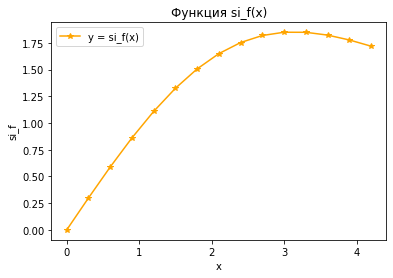

In [6]:
graphic = df.plot(x='x', y='si_f', label='y = si_f(x)',marker='*',color='orange')
graphic.set_title('Функция si_f(x)')
graphic.set_xlabel('x')
graphic.set_ylabel('si_f')
plt.legend(loc='upper left')

# 2 Task

***np.linspace(a, b, n)***

Функция для построения вектора x с равным расстоянием между точками
[a, a + h, ..., b] length = n


In [7]:
def even_distributed_nodes(a, b, n):
    return np.linspace(a, b, n)

***Функция для вычисления корней полиномов Чебышёва***

(неравномерно распределенные узлы)

result - [a, ..., b] length = n


In [8]:
def chebyshev_roots_nodes(a, b, n):
    return [(b - a) / 2 * math.cos((2 * i - 1) * math.pi / (2 * n)) + (a + b) / 2 for i in range(1, n+1)]

In [9]:
x = df['x'].copy()
si_x = df['si_f'].copy()

In [10]:
def _poly_newton_coefficient(x,y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1])

    return a

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1 # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -x_data[n-k])*p
    return p

In [91]:
a1 = 0
b1 = 4.2
n1 = 13
x1 = even_distributed_nodes(a1, b1, n1)
y1 = [si_f(x,e) for x in x1]
newton_polynomial_x = [newton_polynomial(x1, y1, x) for x in x1]

print("Node", "\t", "Err")

for i in range(n1):
    diff = abs(y1[i] - newton_polynomial_x[i])
    if diff < 10**-15: diff = 0
    print(round(x1[i], 1),"\t", diff)

Node 	 Err
0.0 	 0
0.4 	 0
0.7 	 0
1.0 	 0
1.4 	 0
1.8 	 0
2.1 	 0
2.4 	 0
2.8 	 0
3.2 	 0
3.5 	 0
3.9 	 0
4.2 	 0


In [90]:
a1 = 0
b1 = 4.2
n1 = 15
x1 = even_distributed_nodes(a1, b1, n1)
x2 = even_distributed_nodes(a1, b1, -1 + n1 * 2 )
y1 = [si_f(x,e) for x in x1]
newton_polynomial_x = [newton_polynomial(x1, y1, x) for x in x2]

print("Node","\t", "Err")

for i in range(-1 + n1 * 2):
    diff = abs([si_f(x,e) for x in even_distributed_nodes(a1, b1, -1 + n1 * 2)][i] - newton_polynomial_x[i])
    if diff < 10**-15: diff = 0
    print(round(x2[i], 1),"\t", diff)


Node 	 Err
0.0 	 0
0.2 	 1.2702894292004885e-12
0.3 	 0
0.4 	 1.499356194756274e-13
0.6 	 0
0.8 	 3.186340080674199e-14
0.9 	 0
1.0 	 1.0325074129013956e-14
1.2 	 0
1.3 	 4.440892098500626e-15
1.5 	 0
1.6 	 2.886579864025407e-15
1.8 	 0
2.0 	 2.4424906541753444e-15
2.1 	 0
2.2 	 2.220446049250313e-15
2.4 	 0
2.6 	 3.774758283725532e-15
2.7 	 0
2.8 	 5.10702591327572e-15
3.0 	 0
3.2 	 1.3322676295501878e-14
3.3 	 0
3.4 	 4.618527782440651e-14
3.6 	 0
3.8 	 2.3803181647963356e-13
3.9 	 0
4.0 	 2.205347016115411e-12
4.2 	 0


      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


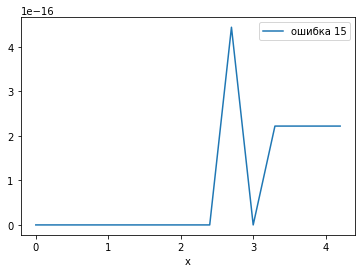

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


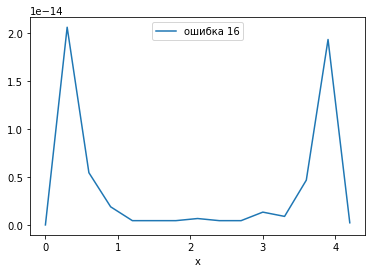

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


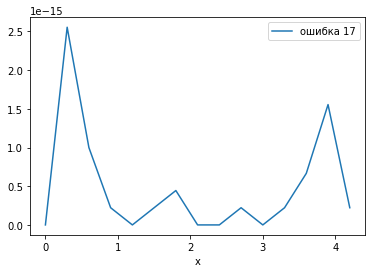

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


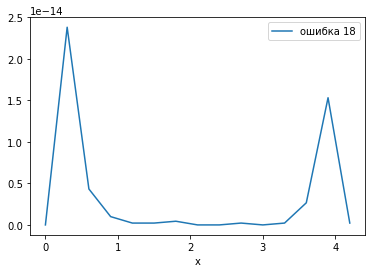

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


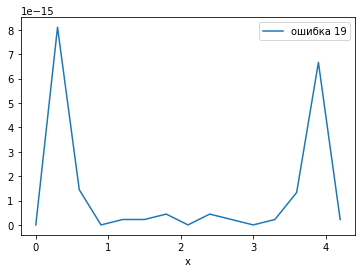

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


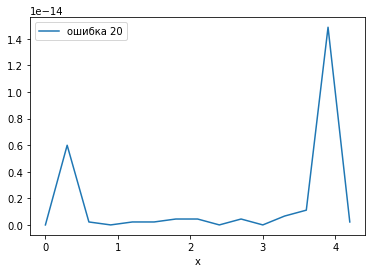

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


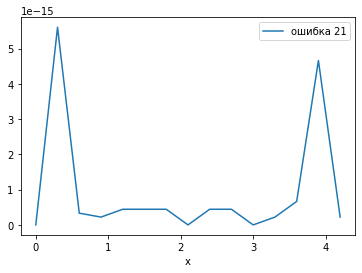

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


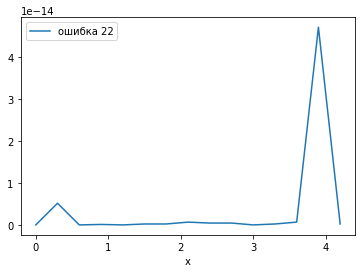

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


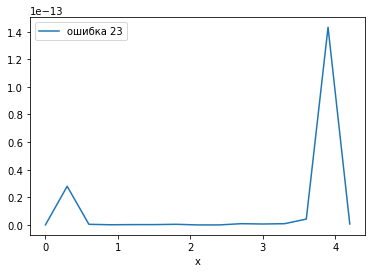

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


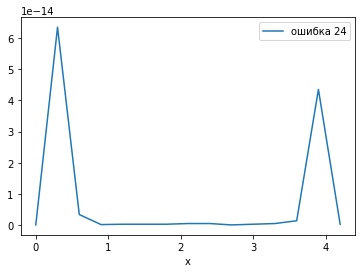

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


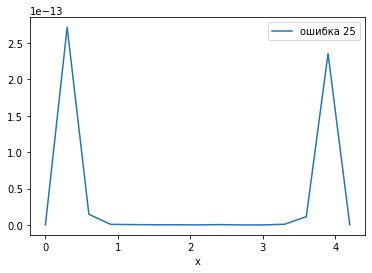

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


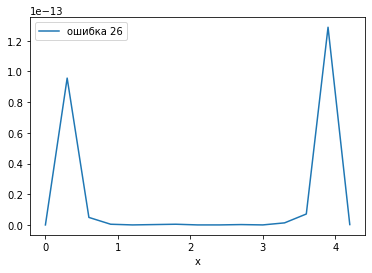

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


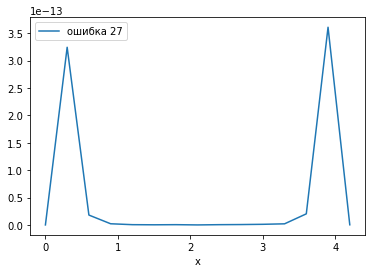

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


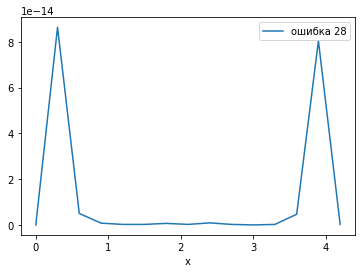

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


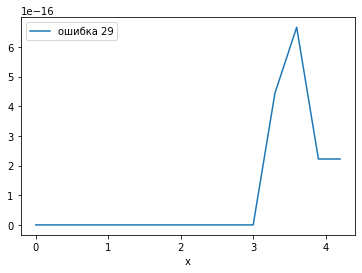

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


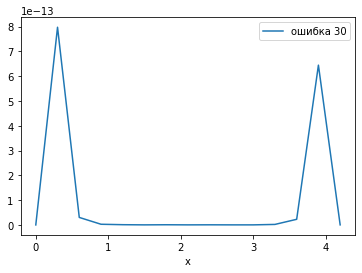

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


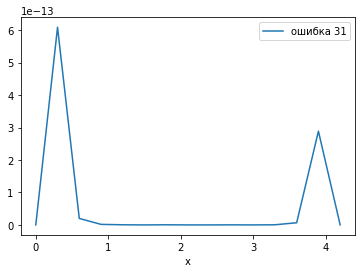

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


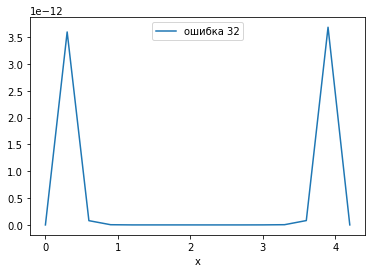

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


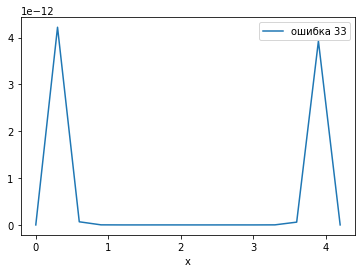

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


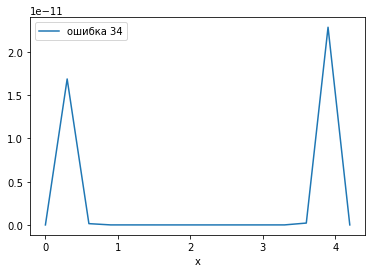

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


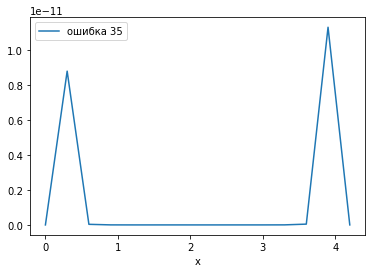

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


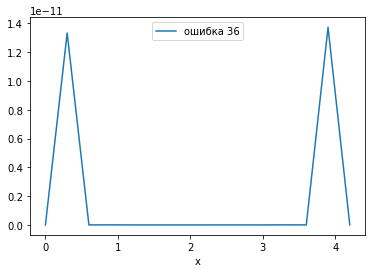

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


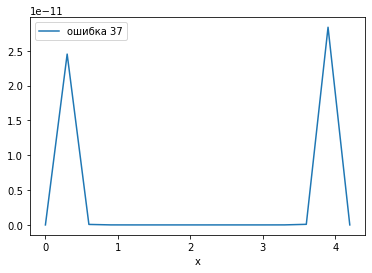

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


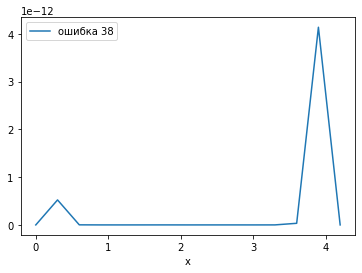

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


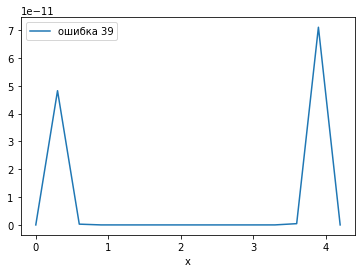

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


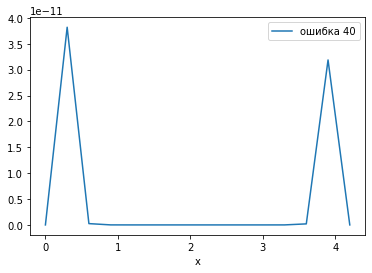

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


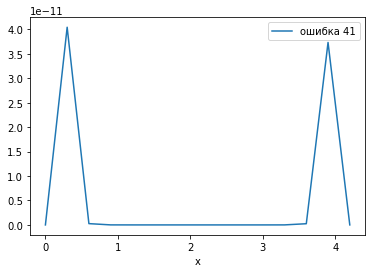

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


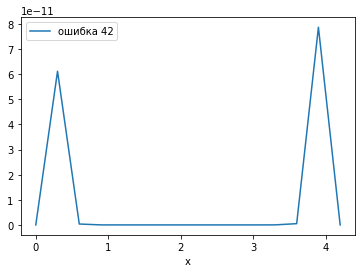

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


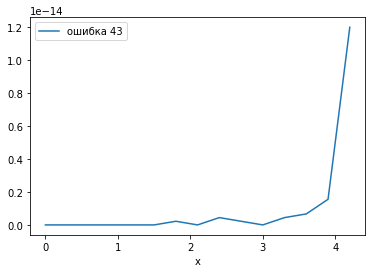

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


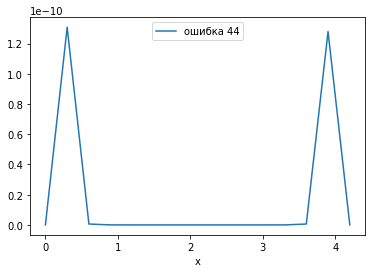

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


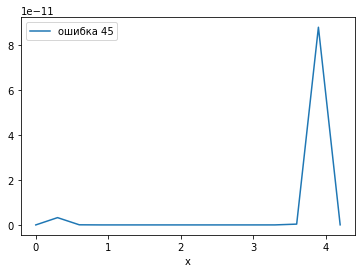

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


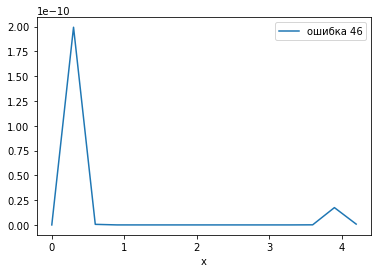

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


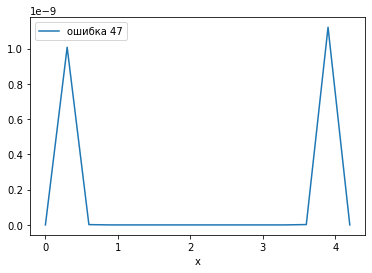

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


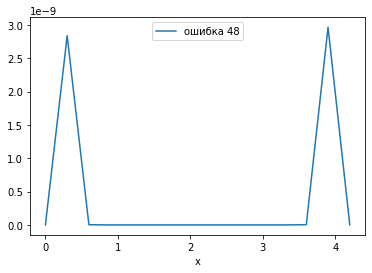

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


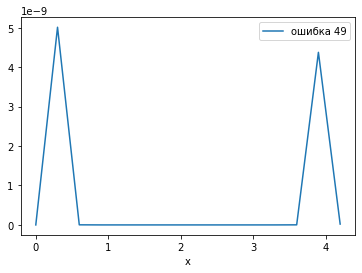

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


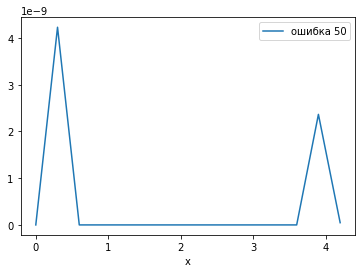

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


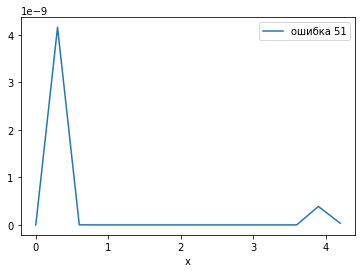

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


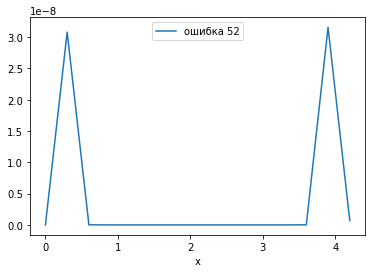

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


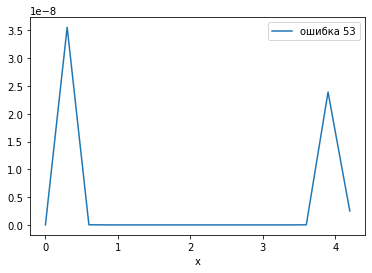

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


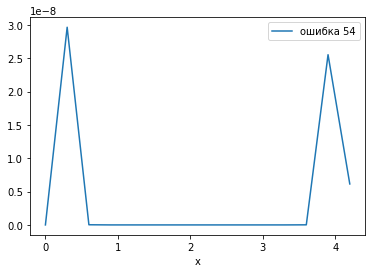

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


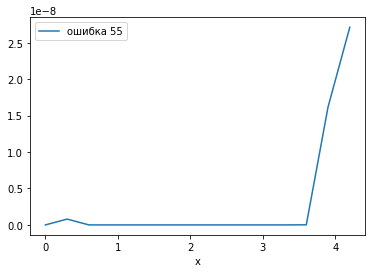

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


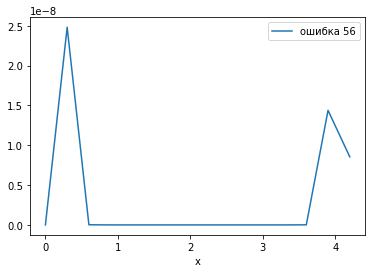

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718368


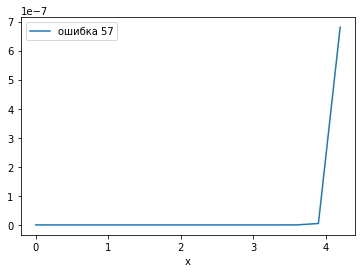

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


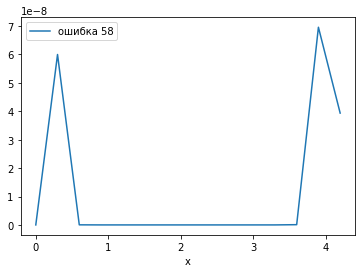

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776502
14  4.2  1.718369              1.718368


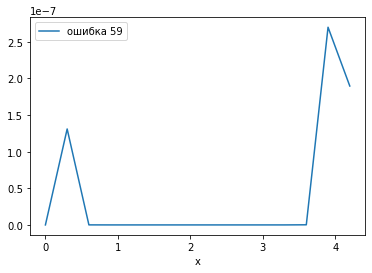

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776501
14  4.2  1.718369              1.718369


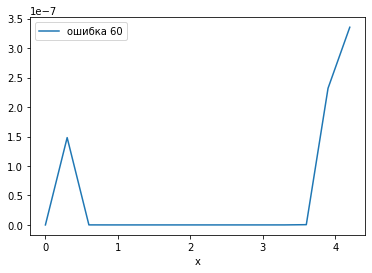

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298505
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776502
14  4.2  1.718369              1.718375


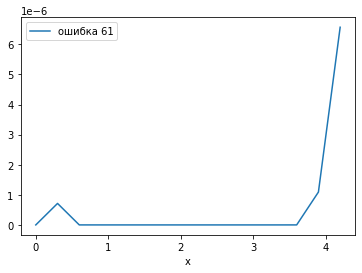

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298500
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776502
14  4.2  1.718369              1.718421


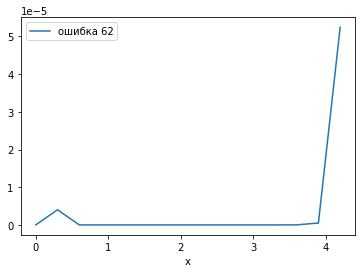

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298499
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776472
14  4.2  1.718369              1.718389


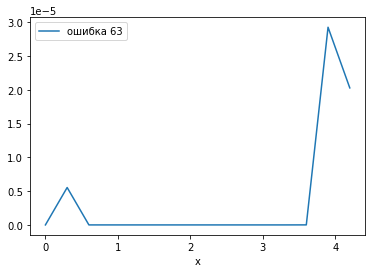

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298488
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776599
14  4.2  1.718369              1.718446


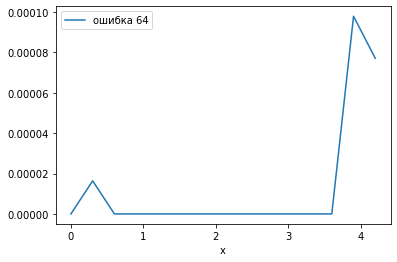

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298500
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.776460
14  4.2  1.718369              1.717792


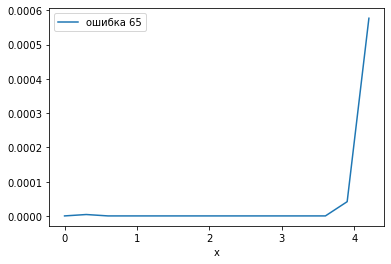

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298004
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.778140
14  4.2  1.718369              1.716643


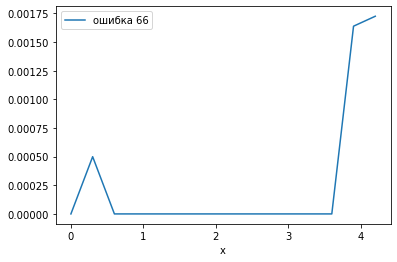

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.300937
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821948
13  3.9  1.776501              1.787314
14  4.2  1.718369              1.731754


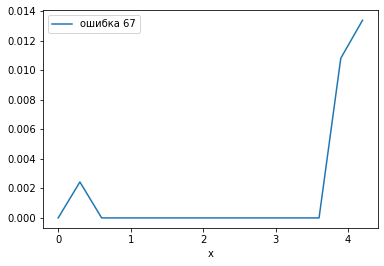

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.300597
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821950
13  3.9  1.776501              1.768187
14  4.2  1.718369              1.717817


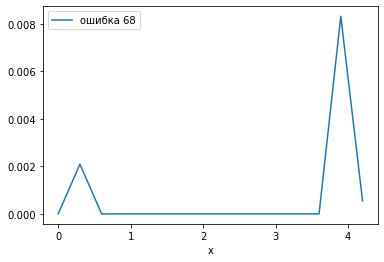

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.296510
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821949
13  3.9  1.776501              1.768478
14  4.2  1.718369              1.659244


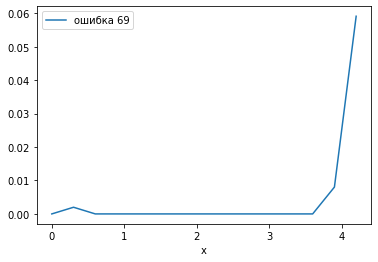

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.300767
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821945
13  3.9  1.776501              1.769180
14  4.2  1.718369              1.755599


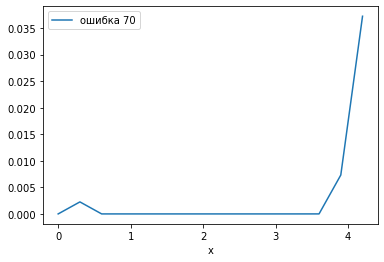

      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.000000
1   0.3  0.298504              0.298504
2   0.6  0.588129              0.588129
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324684
6   1.8  1.505817              1.505817
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752486
9   2.7  1.818212              1.818212
10  3.0  1.848653              1.848653
11  3.3  1.848081              1.848081
12  3.6  1.821948              1.821955
13  3.9  1.776501              1.777462
14  4.2  1.718369              2.197017


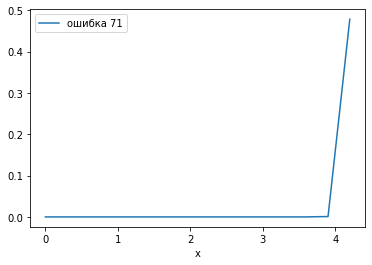

In [84]:
plot_df_с = pd.DataFrame(columns=['Количество узлов', 'Макс.погрешность'])
for i in range(15, 72): 
    X = even_distributed_nodes(a, b, i)
    Y = [si_f(node,e) for node in X]
    newton_polynomial_x = [newton_polynomial(X, Y, node) for node in x]
    
    errors = [abs(y1 - y2) for y1, y2 in zip(si_x, newton_polynomial_x)]
    
    plot_df_с = plot_df_с.append({'Количество узлов' : i, 'Макс.погрешность' : max(errors)}, ignore_index=True)
    
    plot_otr_df = pd.DataFrame(columns=['x', 'ошибка'])
    plot_otr_df['x'] = x
    plot_otr_df[f'ошибка {i}'] = np.array(errors)
    
    plot_otr_df.plot(x='x', y=f'ошибка {i}')
    
    
    print(pd.DataFrame(data={'x': x, 'si_f(x)': si_x, 'newton_polynomial(x)': newton_polynomial_x}))
    plt.show()

In [85]:
plot_df_с.tail(55)


,Количество узлов,Макс.погрешность
2,17.0,2.553513e-15
3,18.0,2.381428e-14
4,19.0,8.104628e-15
5,20.0,1.487699e-14
6,21.0,5.606626e-15
7,22.0,4.707346e-14
8,23.0,1.432188e-13
9,24.0,6.350476e-14
10,25.0,2.716161e-13
11,26.0,1.287859e-13


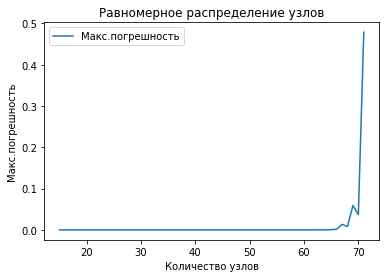

In [86]:
axis = plot_df_с.plot(x='Количество узлов', y='Макс.погрешность')
axis.set_title('Равномерное распределение узлов')
axis.set_xlabel('Количество узлов')
axis.set_ylabel('Макс.погрешность')
plt.show()

***НЕравномерное распределение Чебышева***

[4.188495980273374, 4.097218684219823, 3.9186533479473216, 3.6606041335025283, 3.334349029814194, 2.954146950459181, 2.5366145507172946, 2.1000000000000005, 1.6633854492827054, 1.2458530495408198, 0.8656509701858066, 0.5393958664974723, 0.28134665205267884, 0.10278131578017757, 0.011504019726626069]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.014634
1   0.3  0.298504              0.298353
2   0.6  0.588129              0.588298
3   0.9  0.860471              0.860415
4   1.2  1.108047              1.107997
5   1.5  1.324684              1.324789
6   1.8  1.505817              1.505738
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752544
9   2.7  1.818212              1.818154
10  3.0  1.848653              1.848672
11  3.3  1.848081              1.848096
12  3.6  1.821948              1.821920
13  3.9  1.776501              1.776513
14  4.2  1.718369              1.718328


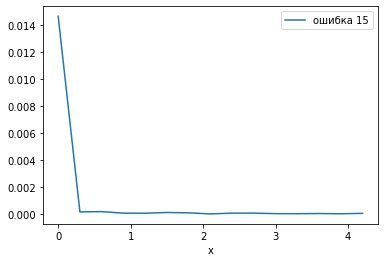

[4.189887926011614, 4.109574705037639, 3.9520346551315457, 3.723321952061748, 3.4322258967436556, 3.0899331473345955, 2.709597822234371, 2.3058359946920777, 1.8941640053079227, 1.4904021777656296, 1.1100668526654047, 0.7677741032563448, 0.4766780479382524, 0.24796534486845467, 0.0904252949623614, 0.010112073988386872]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.012865
1   0.3  0.298504              0.298181
2   0.6  0.588129              0.588346
3   0.9  0.860471              0.860331
4   1.2  1.108047              1.108123
5   1.5  1.324684              1.324677
6   1.8  1.505817              1.505769
7   2.1  1.648699              1.648761
8   2.4  1.752486              1.752449
9   2.7  1.818212              1.818208
10  3.0  1.848653              1.848683
11  3.3  1.848081              1.848043
12  3.6  1.821948              1.821984
13  3.9  1.776501              1.776477
14  4.2  1.718369              1.718400


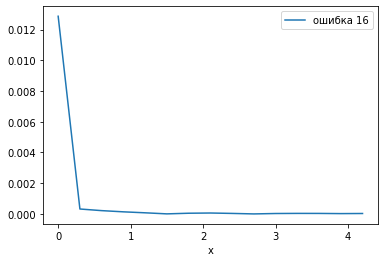

[4.191041770219572, 4.1198338506629195, 3.979842911845631, 3.775836177288503, 3.51476085165777, 3.205507542042448, 2.8586074989930212, 2.485873987414798, 2.1, 1.7141260125852027, 1.341392501006979, 0.9944924579575536, 0.68523914834223, 0.424163822711497, 0.2201570881543693, 0.08016614933708022, 0.008958229780427374]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.011398
1   0.3  0.298504              0.298162
2   0.6  0.588129              0.588270
3   0.9  0.860471              0.860380
4   1.2  1.108047              1.108128
5   1.5  1.324684              1.324617
6   1.8  1.505817              1.505854
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752458
9   2.7  1.818212              1.818249
10  3.0  1.848653              1.848620
11  3.3  1.848081              1.848105
12  3.6  1.821948              1.821925
13  3.9  1.776501              1.776527
14  4.2  1.718369              1.718344


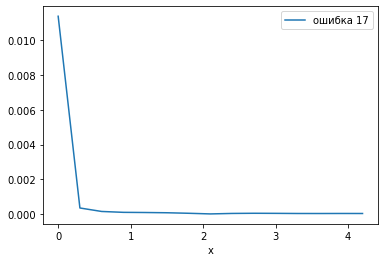

[4.1920088659926655, 4.128444235207043, 4.003246352776965, 3.820219293006883, 3.58492424049175, 3.304510516337197, 2.987498349655469, 2.643519994715294, 2.2830270597700824, 1.9169729402299183, 1.5564800052847063, 1.2125016503445316, 0.8954894836628031, 0.6150757595082503, 0.37978070699311695, 0.19675364722303512, 0.07155576479295656, 0.0079911340073342]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.010168
1   0.3  0.298504              0.298239
2   0.6  0.588129              0.588154
3   0.9  0.860471              0.860475
4   1.2  1.108047              1.108055
5   1.5  1.324684              1.324657
6   1.8  1.505817              1.505855
7   2.1  1.648699              1.648660
8   2.4  1.752486              1.752514
9   2.7  1.818212              1.818198
10  3.0  1.848653              1.848656
11  3.3  1.848081              1.848082
12  3.6  1.821948              1.821952
13  3.9  1.776501              1.776482
14  4.2  1.718369              1.718388


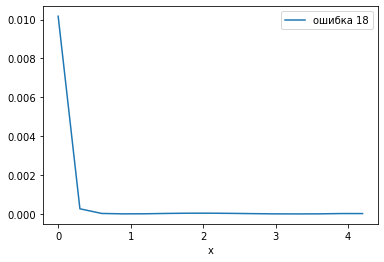

[4.1928274353140065, 4.135740558472595, 4.023123985975621, 3.85804960435131, 3.645020212413576, 3.389846696648303, 3.0994895253778543, 2.7818688853298355, 2.445648639589541, 2.1, 1.754351360410459, 1.4181311146701652, 1.1005104746221455, 0.8101533033516977, 0.5549797875864237, 0.34195039564869045, 0.17687601402437925, 0.06425944152740604, 0.007172564685993255]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.009127
1   0.3  0.298504              0.298358
2   0.6  0.588129              0.588067
3   0.9  0.860471              0.860533
4   1.2  1.108047              1.108001
5   1.5  1.324684              1.324714
6   1.8  1.505817              1.505802
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752497
9   2.7  1.818212              1.818195
10  3.0  1.848653              1.848671
11  3.3  1.848081              1.848064
12  3.6  1.821948              1.821958
13  3.9  1.776501              1.776512
14  4.2  1.718369              1.7183

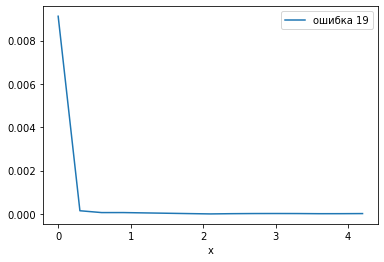

[4.193526400839569, 4.141976832835121, 4.040147018273702, 3.890544345143594, 3.696852527760065, 3.463840901493386, 3.197246985903493, 2.9036352079666887, 2.5902352640974016, 2.2647641010284745, 1.935235898971526, 1.6097647359025988, 1.2963647920333117, 1.0027530140965075, 0.7361590985066147, 0.5031474722399352, 0.30945565485640647, 0.15985298172629792, 0.05802316716487921, 0.00647359916043122]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.008238
1   0.3  0.298504              0.298473
2   0.6  0.588129              0.588041
3   0.9  0.860471              0.860526
4   1.2  1.108047              1.108009
5   1.5  1.324684              1.324715
6   1.8  1.505817              1.505788
7   2.1  1.648699              1.648724
8   2.4  1.752486              1.752464
9   2.7  1.818212              1.818230
10  3.0  1.848653              1.848637
11  3.3  1.848081              1.848096
12  3.6  1.821948              1.821934
13  3.9  1.776501              1.776499
14 

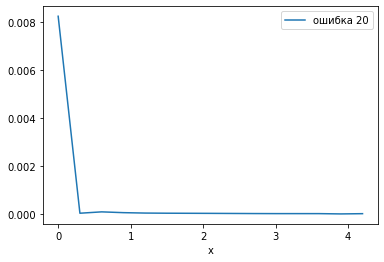

[4.194127974080478, 4.14734861558183, 4.05483487215283, 3.9186533479473216, 3.741846113182863, 3.528362749318931, 3.2829721219336063, 3.011155852146872, 2.7189858662628987, 2.412988758969967, 2.1, 1.787011241030034, 1.4810141337371012, 1.188844147853128, 0.9170278780663936, 0.6716372506810697, 0.45815388681713776, 0.2813466520526793, 0.14516512784717084, 0.05265138441817019, 0.0058720259195217395]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.007473
1   0.3  0.298504              0.298558
2   0.6  0.588129              0.588067
3   0.9  0.860471              0.860481
4   1.2  1.108047              1.108052
5   1.5  1.324684              1.324678
6   1.8  1.505817              1.505820
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752483
9   2.7  1.818212              1.818215
10  3.0  1.848653              1.848651
11  3.3  1.848081              1.848078
12  3.6  1.821948              1.821958
13  3.9  1.776501              1.776497

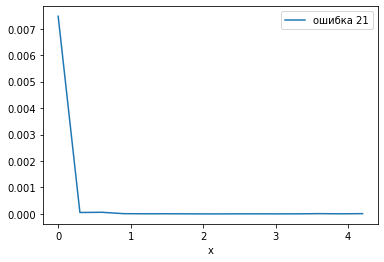

[4.194649440681532, 4.152008418539435, 4.0675944224995, 3.9431258780912373, 3.781136605941157, 3.58492424049175, 3.358483099673829, 3.1064228721121196, 2.8338747771581065, 2.5463871080612517, 2.249812284718388, 1.9501877152816123, 1.653612891938749, 1.3661252228418936, 1.0935771278878805, 0.8415169003261715, 0.6150757595082503, 0.4188633940588433, 0.25687412190876313, 0.13240557750050064, 0.04799158146056515, 0.005350559318467507]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.006810
1   0.3  0.298504              0.298602
2   0.6  0.588129              0.588115
3   0.9  0.860471              0.860443
4   1.2  1.108047              1.108076
5   1.5  1.324684              1.324659
6   1.8  1.505817              1.505837
7   2.1  1.648699              1.648681
8   2.4  1.752486              1.752501
9   2.7  1.818212              1.818199
10  3.0  1.848653              1.848664
11  3.3  1.848081              1.848073
12  3.6  1.821948              1.821946
13  3

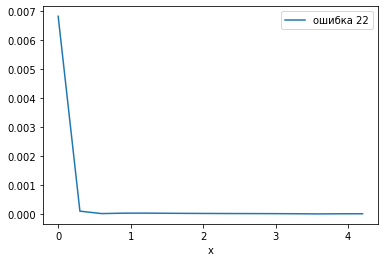

[4.195104415300133, 4.156076584132878, 4.078747936449523, 3.964558958644988, 3.8156367753219285, 3.634755524984061, 3.425284683084711, 3.191126295074411, 2.936642288677107, 2.6665732194297513, 2.385949963102118, 2.1, 1.814050036897882, 1.5334267805702493, 1.263357711322893, 1.00887370492559, 0.7747153169152889, 0.5652444750159393, 0.38436322467807194, 0.2354410413550121, 0.12125206355047724, 0.043923415867122007, 0.004895584699867506]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.006231
1   0.3  0.298504              0.298607
2   0.6  0.588129              0.588156
3   0.9  0.860471              0.860437
4   1.2  1.108047              1.108065
5   1.5  1.324684              1.324676
6   1.8  1.505817              1.505819
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752484
9   2.7  1.818212              1.818216
10  3.0  1.848653              1.848645
11  3.3  1.848081              1.848090
12  3.6  1.821948              1.821944
1

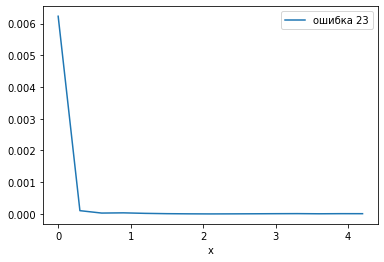

[4.195503738801067, 4.159649088846784, 4.088553271939722, 3.9834327572186456, 3.846086185835345, 3.6788635957058524, 3.484626211710145, 3.266697489341165, 3.028806249459903, 2.7750228771366396, 2.5096896762338696, 2.237346571383301, 1.9626534286166994, 1.690310323766131, 1.4249771228633608, 1.1711937505400978, 0.9333025106588353, 0.7153737882898554, 0.5211364042941478, 0.3539138141646554, 0.21656724278135497, 0.11144672806027822, 0.040350911153216096, 0.0044962611989327605]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.005723
1   0.3  0.298504              0.298584
2   0.6  0.588129              0.588171
3   0.9  0.860471              0.860458
4   1.2  1.108047              1.108040
5   1.5  1.324684              1.324697
6   1.8  1.505817              1.505803
7   2.1  1.648699              1.648711
8   2.4  1.752486              1.752475
9   2.7  1.818212              1.818220
10  3.0  1.848653              1.848649
11  3.3  1.848081              1.848077
1

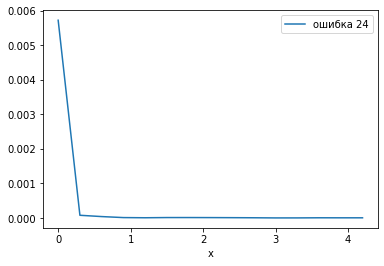

[4.19585612969937, 4.162803226530246, 4.097218684219823, 4.000136810178641, 3.8730886435542318, 3.7180778098291576, 3.537548922450246, 3.3343490298141942, 3.111682715613602, 2.873061560637824, 2.622248763046195, 2.3631997904850395, 2.1, 1.8368002095149614, 1.577751236953805, 1.3269384393621768, 1.0883172843863977, 0.8656509701858066, 0.6624510775497536, 0.4819221901708428, 0.32691135644576885, 0.19986318982135942, 0.10278131578017757, 0.03719677346975381, 0.004143870300629793]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.005274
1   0.3  0.298504              0.298546
2   0.6  0.588129              0.588160
3   0.9  0.860471              0.860482
4   1.2  1.108047              1.108029
5   1.5  1.324684              1.324696
6   1.8  1.505817              1.505812
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752489
9   2.7  1.818212              1.818205
10  3.0  1.848653              1.848660
11  3.3  1.848081              1.84807

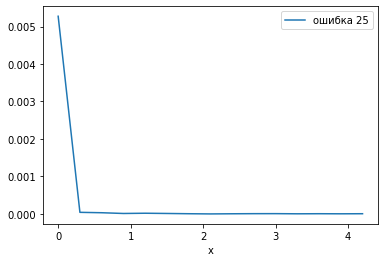

[4.196168663868967, 4.165601804589002, 4.104913819667946, 4.014989676583389, 3.89714067183304, 3.7530853092790055, 3.58492424049175, 3.395109632519941, 3.1864094097730793, 2.9618668914507897, 2.7247564130959265, 2.4785355794092023, 2.226794844586801, 1.9732051554131995, 1.721464420590798, 1.475243586904074, 1.2381331085492109, 1.0135905902269216, 0.8048903674800596, 0.6150757595082503, 0.4469146907209949, 0.3028593281669605, 0.18501032341661094, 0.0950861803320544, 0.03439819541099842, 0.0038313361310331473]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.004877
1   0.3  0.298504              0.298508
2   0.6  0.588129              0.588137
3   0.9  0.860471              0.860491
4   1.2  1.108047              1.108039
5   1.5  1.324684              1.324680
6   1.8  1.505817              1.505825
7   2.1  1.648699              1.648690
8   2.4  1.752486              1.752492
9   2.7  1.818212              1.818210
10  3.0  1.848653              1.848649
11  3.

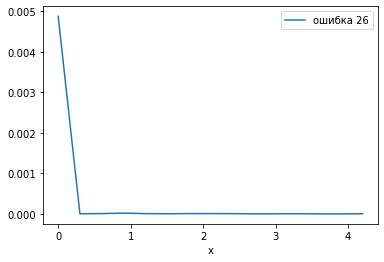

[4.196447132369663, 4.168096281325637, 4.111777975862527, 4.0282538244485755, 3.9186533479473216, 3.7844587047855924, 3.6274846473034024, 3.449853980341733, 3.2539688539486926, 3.0424782784209707, 2.818242300983904, 2.5842933285591245, 2.3437951196629836, 2.1, 1.8562048803370166, 1.6157066714408757, 1.3817576990160958, 1.1575217215790294, 0.9460311460513073, 0.7501460196582674, 0.5725153526965985, 0.41554129521440797, 0.28134665205267884, 0.17174617555142468, 0.08822202413747338, 0.03190371867436337, 0.003552867630336909]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.004522
1   0.3  0.298504              0.298479
2   0.6  0.588129              0.588116
3   0.9  0.860471              0.860482
4   1.2  1.108047              1.108055
5   1.5  1.324684              1.324673
6   1.8  1.505817              1.505823
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752481
9   2.7  1.818212              1.818218
10  3.0  1.848653              1

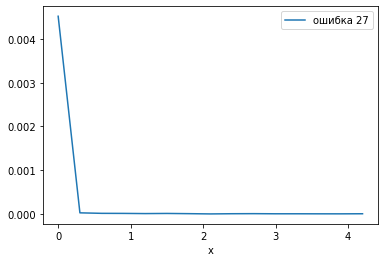

[4.196696311537416, 4.170329138888295, 4.117926376084709, 4.040147018273702, 3.9379691860083827, 3.812677824814447, 3.665848546254648, 3.4993278136992085, 3.3152097219775922, 3.115809662921004, 2.9036352079666887, 2.681354573992184, 2.4517630689399468, 2.217747939198103, 1.9822520608018974, 1.7482369310600538, 1.5186454260078164, 1.2963647920333117, 1.0841903370789967, 0.884790278022408, 0.7006721863007919, 0.5341514537453522, 0.38732217518555356, 0.2620308139916172, 0.15985298172629792, 0.08207362391529127, 0.029670861111704472, 0.003303688462584997]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.004205
1   0.3  0.298504              0.298464
2   0.6  0.588129              0.588106
3   0.9  0.860471              0.860467
4   1.2  1.108047              1.108059
5   1.5  1.324684              1.324681
6   1.8  1.505817              1.505812
7   2.1  1.648699              1.648705
8   2.4  1.752486              1.752482
9   2.7  1.818212              1.818211
10

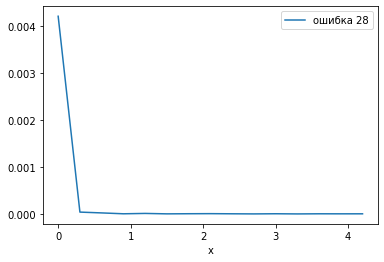

[4.19692016908736, 4.172335697337205, 4.123454984290369, 4.050851111615263, 3.9553752933366484, 3.8381468961294702, 3.7005403157680368, 3.544168863592189, 3.370865851906907, 3.182663100071746, 2.9817671132765557, 2.7705332132855585, 2.5514379244431504, 2.327049938690278, 2.1, 1.8729500613097225, 1.6485620755568495, 1.4294667867144424, 1.2182328867234444, 1.0173368999282548, 0.8291341480930938, 0.6558311364078115, 0.49945968423196363, 0.36185310387053016, 0.244624706663352, 0.14914888838473805, 0.07654501570963168, 0.02766430266279496, 0.0030798309126400802]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.003920
1   0.3  0.298504              0.298463
2   0.6  0.588129              0.588111
3   0.9  0.860471              0.860458
4   1.2  1.108047              1.108050
5   1.5  1.324684              1.324690
6   1.8  1.505817              1.505811
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752490
9   2.7  1.818212              1.818

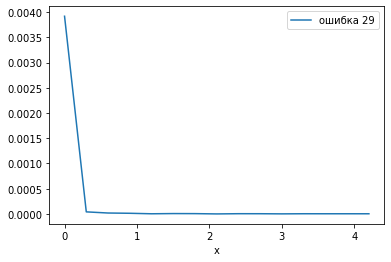

[4.197122022984605, 4.174145515249789, 4.128444235207043, 4.060518895644124, 3.9711137007955726, 3.8612081926853907, 3.732006519059639, 3.58492424049175, 3.421572821204659, 3.2437419735315576, 3.0533800494530485, 2.852572694045131, 2.6435199947152936, 2.428512376584485, 2.209905508110182, 1.9900944918898185, 1.7714876234155152, 1.5564800052847068, 1.3474273059548696, 1.1466199505469519, 0.9562580264684439, 0.7784271787953418, 0.6150757595082503, 0.4679934809403612, 0.33879180731460967, 0.2288862992044276, 0.13948110435587635, 0.07155576479295656, 0.025854484750210904, 0.00287797701539505]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.003664
1   0.3  0.298504              0.298473
2   0.6  0.588129              0.588123
3   0.9  0.860471              0.860461
4   1.2  1.108047              1.108041
5   1.5  1.324684              1.324689
6   1.8  1.505817              1.505819
7   2.1  1.648699              1.648694
8   2.4  1.752486              1.752487
9   

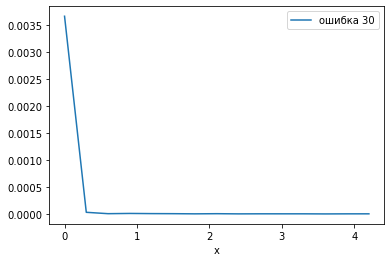

[4.197304665059211, 4.175783481089034, 4.132961949619029, 4.069279477508869, 3.985389533098558, 3.8821529407389774, 3.760629047569167, 3.6220648531811523, 3.467882213716667, 3.299663251699064, 3.11913412131527, 2.9281472957379693, 2.728662558244052, 2.5227268921861863, 2.3124534761736077, 2.1, 1.8875465238263927, 1.6772731078138141, 1.4713374417559486, 1.2718527042620313, 1.0808658786847303, 0.9003367483009366, 0.7321177862833337, 0.5779351468188478, 0.43937095243083335, 0.3178470592610234, 0.2146104669014426, 0.13072052249113097, 0.0670380503809711, 0.02421651891096621, 0.002695334940788996]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.003431
1   0.3  0.298504              0.298489
2   0.6  0.588129              0.588136
3   0.9  0.860471              0.860471
4   1.2  1.108047              1.108040
5   1.5  1.324684              1.324681
6   1.8  1.505817              1.505822
7   2.1  1.648699              1.648699
8   2.4  1.752486              1.752482


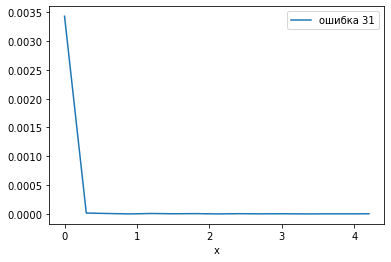

[4.197470458030862, 4.17727067092604, 4.137065631708543, 4.077242536884344, 3.9983775155592314, 3.9012300810005716, 3.7867358161093545, 3.6559973632454144, 3.5102738051787385, 3.3509685394341107, 3.1796157628057653, 2.9978656962035926, 2.8074686921236625, 2.610258377796854, 2.40813399635626, 2.203042116087578, 1.9969578839124222, 1.7918660036437406, 1.589741622203146, 1.3925313078763382, 1.202134303796408, 1.0203842371942349, 0.84903146056589, 0.6897261948212614, 0.5440026367545863, 0.4132641838906459, 0.29876991899942884, 0.20162248444076902, 0.1227574631156565, 0.0629343682914576, 0.02272932907396008, 0.002529541969138016]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.003220
1   0.3  0.298504              0.298505
2   0.6  0.588129              0.588142
3   0.9  0.860471              0.860478
4   1.2  1.108047              1.108047
5   1.5  1.324684              1.324678
6   1.8  1.505817              1.505816
7   2.1  1.648699              1.648703
8   2.4

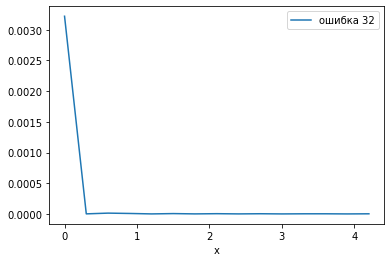

[4.197621412284317, 4.178625027949959, 4.140804293479437, 4.084501719300804, 4.010227190244489, 3.9186533479473216, 3.810609499305705, 3.6870741061439425, 3.5491659241124354, 3.398133871063271, 3.235345716656755, 3.0622756956275623, 2.8804911568866878, 2.6916383693670025, 2.4974276131568613, 2.299617690938784, 2.1, 1.9003823090612169, 1.7025723868431388, 1.508361630632998, 1.3195088431133124, 1.1377243043724383, 0.9646542833432452, 0.801866128936729, 0.6508340758875653, 0.5129258938560579, 0.38939050069429504, 0.28134665205267884, 0.1897728097555118, 0.11549828069919621, 0.059195706520562386, 0.021374972050041574, 0.0023785877156834445]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.003028
1   0.3  0.298504              0.298517
2   0.6  0.588129              0.588140
3   0.9  0.860471              0.860478
4   1.2  1.108047              1.108053
5   1.5  1.324684              1.324683
6   1.8  1.505817              1.505813
7   2.1  1.648699              1.64

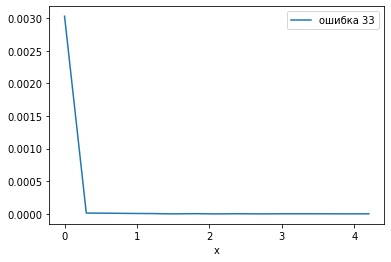

[4.197759247084982, 4.1798619048379315, 4.144219914157455, 4.091137359941029, 4.021067123824844, 3.9346070203573764, 3.8324946966564353, 3.7156013390640457, 3.58492424049175, 3.441578291869119, 3.286786470287443, 3.1218694049903988, 2.9482341102309797, 2.7673619811219936, 2.580796154895282, 2.390128345398953, 2.196985263156053, 2.0030147368439475, 1.8098716546010474, 1.6192038451047186, 1.4326380188780072, 1.251765889769021, 1.0781305950096023, 0.913213529712557, 0.7584217081308815, 0.6150757595082503, 0.4843986609359543, 0.3675053033435649, 0.2653929796426244, 0.17893287617515607, 0.10886264005897162, 0.05578008584254501, 0.020138095162069547, 0.0022407529150179073]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.002853
1   0.3  0.298504              0.298523
2   0.6  0.588129              0.588132
3   0.9  0.860471              0.860473
4   1.2  1.108047              1.108051
5   1.5  1.324684              1.324687
6   1.8  1.505817              1.505816
7   

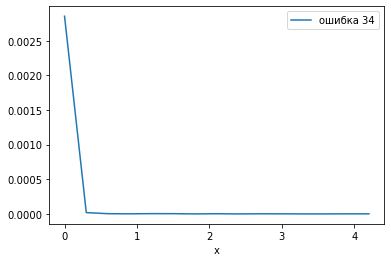

[4.197885439736761, 4.180994499712663, 4.14734861558183, 4.097218684219823, 4.031008322358047, 3.9492506168991497, 3.8526038328147356, 3.741846113182863, 3.6178692140375226, 3.4816713244733966, 3.334349029814194, 3.177088482552403, 3.011155852146872, 2.8378871305708198, 2.6586773756900177, 2.4749694790771373, 2.2882425486972107, 2.1, 1.91175745130279, 1.7250305209228634, 1.541322624309983, 1.3621128694291804, 1.188844147853128, 1.0229115174475973, 0.8656509701858066, 0.7183286755266038, 0.582130785962478, 0.45815388681713776, 0.3473961671852648, 0.25074938310085026, 0.16899167764195377, 0.10278131578017757, 0.05265138441817019, 0.019005500287337274, 0.002114560263239529]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.002692
1   0.3  0.298504              0.298523
2   0.6  0.588129              0.588125
3   0.9  0.860471              0.860467
4   1.2  1.108047              1.108046
5   1.5  1.324684              1.324686
6   1.8  1.505817              1.505820


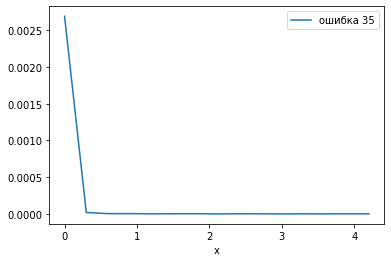

[4.198001265321901, 4.1820342088850015, 4.15022161495186, 4.102805596571277, 4.040147018273702, 3.962722749674266, 3.87112203620706, 3.7660420146115943, 3.6482824073012607, 3.5187394359928867, 3.3783990009183134, 3.2283291775283303, 3.0696720877935713, 2.9036352079666887, 2.7314821789589736, 2.554523189270016, 2.374105003662108, 2.1916007134672055, 2.0083992865327946, 1.825894996337892, 1.6454768107299846, 1.468517821041027, 1.2963647920333117, 1.1303279122064283, 0.9716708224716706, 0.8216009990816866, 0.6812605640071134, 0.5517175926987397, 0.43395798538840635, 0.32887796379294043, 0.23727725032573432, 0.15985298172629792, 0.09719440342872376, 0.04977838504814036, 0.017965791114998186, 0.001998734678098746]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.002544
1   0.3  0.298504              0.298518
2   0.6  0.588129              0.588121
3   0.9  0.860471              0.860465
4   1.2  1.108047              1.108043
5   1.5  1.324684              1.324682
6

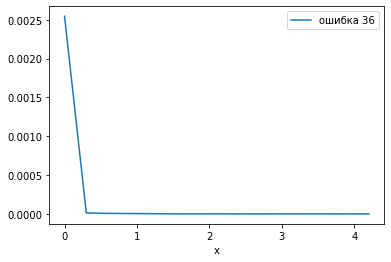

[4.198107829029832, 4.182990914043641, 4.152866001790141, 4.107950142952427, 4.04856695732267, 3.975144302114094, 3.8882111892399536, 3.7883939737705754, 3.6764118410307214, 3.5530716248528473, 3.4192619943208493, 3.2759470508889503, 3.124159382008633, 2.964992621312385, 2.799593568958321, 2.6291539289087633, 2.454901722675883, 2.2780924413985693, 2.1, 1.921907558601431, 1.7450982773241173, 1.5708460710912375, 1.400406431041679, 1.2350073786876155, 1.075840617991368, 0.9240529491110498, 0.7807380056791511, 0.6469283751471533, 0.5235881589692795, 0.4116060262294252, 0.3117888107600464, 0.22485569788590598, 0.1514330426773307, 0.09204985704757318, 0.04713399820985931, 0.017009085956358305, 0.001892170970168916]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.002409
1   0.3  0.298504              0.298510
2   0.6  0.588129              0.588122
3   0.9  0.860471              0.860468
4   1.2  1.108047              1.108045
5   1.5  1.324684              1.324681
6

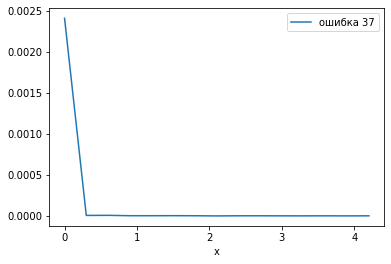

[4.198206092613333, 4.183873217447795, 4.155305375187444, 4.112697713162331, 4.0563412849076865, 3.986621061973156, 3.9040133041767593, 3.8090823062674097, 3.7024765432195936, 3.58492424049175, 3.457228399507976, 3.320261312344071, 3.1749586030881622, 3.022312836579478, 2.863366738184043, 2.699206070923122, 2.530952218610832, 2.3597545256656307, 2.186782445922508, 2.013217554077493, 1.8402454743343704, 1.6690477813891684, 1.5007939290768788, 1.3366332618159573, 1.1776871634205226, 1.0250413969118384, 0.8797386876559297, 0.742771600492024, 0.6150757595082503, 0.49752345678040677, 0.39091769373259067, 0.2959866958232409, 0.2133789380268445, 0.14365871509231432, 0.08730228683766939, 0.044694624812555706, 0.016126782552205565, 0.0017939073866677369]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.002284
1   0.3  0.298504              0.298502
2   0.6  0.588129              0.588126
3   0.9  0.860471              0.860473
4   1.2  1.108047              1.108049
5   

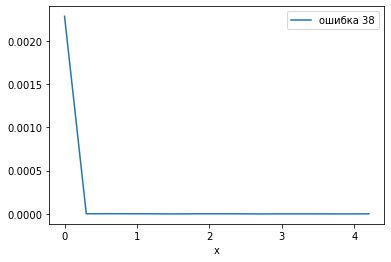

[4.198296896160296, 4.184688635605914, 4.157560369288762, 4.117088034425882, 4.063534109639371, 3.997245912681803, 3.918653347947321, 3.8282661183766784, 3.726670419838075, 3.614525139422011, 3.49255758230567, 3.361558754899756, 3.2223782348683825, 3.0759186612919143, 2.9231298807061576, 2.765002786983093, 2.6025628950038717, 2.4368636898012968, 2.268979794305124, 2.1, 1.9310202056948762, 1.7631363101987039, 1.597437104996129, 1.4349972130169077, 1.2768701192938425, 1.1240813387080861, 0.9776217651316177, 0.8384412451002441, 0.7074424176943306, 0.5854748605779896, 0.4733295801619255, 0.37173388162332177, 0.2813466520526793, 0.20275408731819766, 0.13646589036062906, 0.08291196557411817, 0.0424396307112378, 0.015311364394086535, 0.0017031038397039566]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.002168
1   0.3  0.298504              0.298496
2   0.6  0.588129              0.588131
3   0.9  0.860471              0.860475
4   1.2  1.108047              1.108050


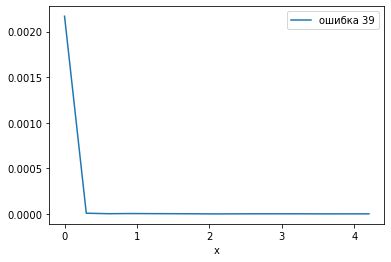

[4.198380976105518, 4.185443759605345, 4.159649088846784, 4.121155996552659, 4.070201805437216, 4.007100665032671, 3.9322416148528743, 3.846086185835345, 3.7491655548495646, 3.6420772698149397, 3.525481565619178, 3.4000972935506515, 3.2666974893411647, 3.1261046071436054, 2.9791854488285994, 2.8268458198627355, 2.670024944716656, 2.5096896762338696, 2.3468285346614595, 2.1824456130940444, 2.0175543869059567, 1.8531714653385412, 1.690310323766131, 1.529975055283344, 1.3731541801372655, 1.2208145511714017, 1.0738953928563943, 0.9333025106588353, 0.7999027064493491, 0.674518434380823, 0.5579227301850604, 0.4508344451504356, 0.3539138141646554, 0.26775838514712635, 0.19289933496732914, 0.1297981945627833, 0.07884400344734077, 0.040350911153216096, 0.01455624039465464, 0.0016190238944817636]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.002061
1   0.3  0.298504              0.298494
2   0.6  0.588129              0.588134
3   0.9  0.860471              0.860473
4 

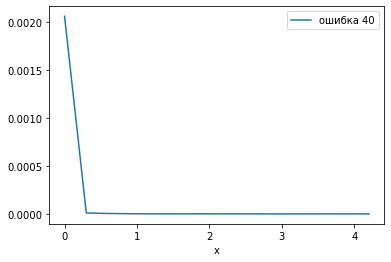

[4.198458980206701, 4.186144388495318, 4.161587471993395, 4.124932340451596, 4.07639410075708, 4.016257594600755, 3.9448757269129793, 3.862667394877095, 3.7701150296741957, 3.667761765385122, 3.5562082516637075, 3.436109128885776, 3.308169186459103, 3.173139226838932, 3.0318116595206153, 2.8850158508656145, 2.733613257049904, 2.5784923686965895, 2.4205634968596366, 2.260753430956641, 2.1000000000000005, 1.9392465690433593, 1.7794365031403636, 1.6215076313034111, 1.4663867429500967, 1.3149841491343859, 1.1681883404793845, 1.026860773161068, 0.891830813540897, 0.7638908711142249, 0.6437917483362927, 0.5322382346148784, 0.42988497032580475, 0.3373326051229051, 0.2551242730870209, 0.18374240539924513, 0.12360589924292098, 0.07506765954840411, 0.038412528006604774, 0.013855611504682397, 0.0015410197932990144]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000             -0.001962
1   0.3  0.298504              0.298494
2   0.6  0.588129              0.588134
3   0.9  0.860471       

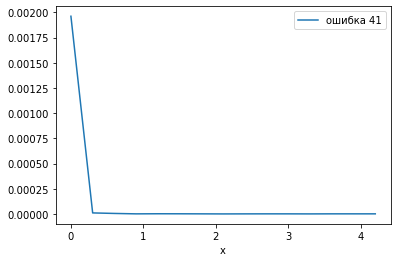

[4.198531480055637, 4.186795640775809, 4.163389593789906, 4.128444235207043, 4.082154993647572, 4.02478073732695, 3.9566423263596806, 3.878120818379397, 3.7896553375100037, 3.6917406186054516, 3.58492424049175, 3.4698035636840547, 3.347022389704353, 3.217267360682207, 3.0812641193734303, 2.9397732510714563, 2.793586030105851, 2.643519994715294, 2.4904143750421204, 2.335125399816947, 2.1785215079802844, 2.0214784920197166, 1.8648746001830536, 1.7095856249578794, 1.5564800052847068, 1.4064139698941494, 1.260226748928544, 1.11873588062657, 0.9827326393177935, 0.852977610295647, 0.7301964363159457, 0.6150757595082503, 0.5082593813945491, 0.41034466248999646, 0.32187918162060325, 0.24335767364031935, 0.17521926267305044, 0.11784500635242812, 0.071555764792957, 0.03661040621009448, 0.013204359224190387, 0.0014685199443631447]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.003729
1   0.3  0.298504              0.298688
2   0.6  0.588129              0.588078
3   0.9 

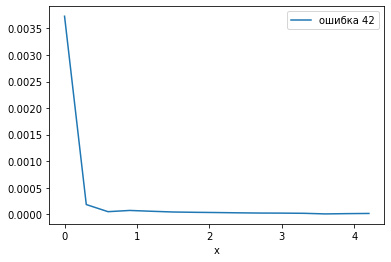

[4.198598981577502, 4.187402048003887, 4.165067921341879, 4.131715763820593, 4.0875235236309795, 4.032726985495235, 3.9676185126532895, 3.8925454869784275, 3.8079084555446876, 3.7141589935349177, 3.6117972948917916, 3.501369503566703, 3.3834647996054836, 3.2587122556179366, 3.12777748040328, 2.991359067639212, 2.850184868582379, 2.7050081086669993, 2.55660336872127, 2.4057624522435104, 2.2532901607879063, 2.1, 1.946709839212094, 1.7942375477564898, 1.6433966312787307, 1.4949918913330016, 1.3498151314176212, 1.2086409323607878, 1.072222519596721, 0.9412877443820635, 0.8165352003945165, 0.6986304964332974, 0.588202705108209, 0.4858410064650831, 0.3920915444553128, 0.30745451302157245, 0.2323814873467105, 0.1672730145047654, 0.11247647636902025, 0.06828423617940693, 0.03493207865812131, 0.012597951996113466, 0.001401018422497291]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.003558
1   0.3  0.298504              0.298570
2   0.6  0.588129              0.588166
3

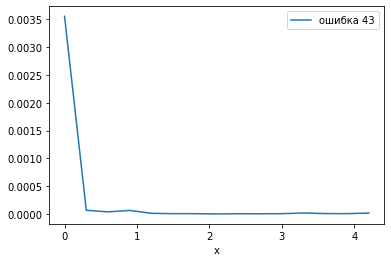

[4.1986619338796825, 4.187967633720985, 4.1666335291058445, 4.134768333741166, 4.092534425358371, 4.040147018273702, 3.977873066705394, 3.9060299044361715, 3.8249836277530322, 3.735147229904486, 3.636978496581624, 3.5309776731471714, 3.4176849154997893, 3.297677537563425, 3.1715670694278892, 3.0399961411316965, 2.9036352079666887, 2.7631791339915526, 2.6193436511638524, 2.4728617121340375, 2.3244797552867373, 2.1749539010618593, 2.0250460989381414, 1.875520244713263, 1.7271382878659636, 1.5806563488361478, 1.4368208660084478, 1.2963647920333112, 1.160003858868304, 1.0284329305721112, 0.902322462436576, 0.7823150845002107, 0.6690223268528293, 0.563021503418377, 0.46485277009551407, 0.3750163722469677, 0.2939700955638289, 0.2221269332946063, 0.15985298172629792, 0.10746557464162887, 0.06523166625883459, 0.03336647089415612, 0.012032366279015605, 0.0013380661203177269]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.003398
1   0.3  0.298504              0.298454
2

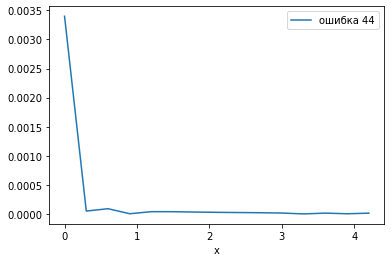

[4.198720736740102, 4.188495980273374, 4.168096281325637, 4.137621025179593, 4.097218684219823, 4.047086094590254, 3.987467497228251, 3.9186533479473216, 3.840978902365588, 3.7548225825741164, 3.6606041335025283, 3.5587825779638944, 3.4498539803417327, 3.334349029814194, 3.2128304548897306, 3.085890281850371, 2.9541469504591804, 2.8182423009839046, 2.678838447215698, 2.536614550717295, 2.392263512016138, 2.2464885948626634, 2.1, 1.9535114051373368, 1.8077364879838629, 1.663385449282706, 1.521161552784302, 1.3817576990160958, 1.2458530495408198, 1.11410971814963, 0.98716954511027, 0.8656509701858066, 0.7501460196582674, 0.6412174220361062, 0.5393958664974723, 0.445177417425884, 0.3590210976344126, 0.28134665205267884, 0.2125325027717493, 0.1529139054097466, 0.10278131578017757, 0.06237897482040733, 0.03190371867436337, 0.011504019726626069, 0.0012792632598990217]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.003249
1   0.3  0.298504              0.298371
2   0

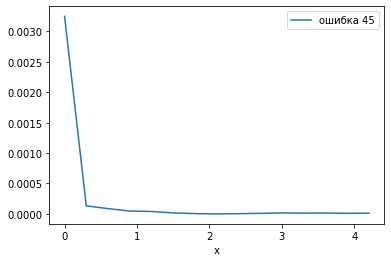

[4.198775746968966, 4.188990285601999, 4.169464987206114, 4.140290887735677, 4.101604010309738, 4.053584731009449, 3.996456937881519, 3.930486987068778, 3.855982460934893, 3.7732907339733996, 3.6827973531874587, 3.58492424049175, 3.4801277255177423, 3.368896417994299, 3.2517489296235693, 3.1292314560738363, 3.001915230363172, 2.870393859507419, 2.735280556850259, 2.5972052829795382, 2.4568118085602, 2.314754712778272, 2.1716963313905326, 2.0283036686094675, 1.8852452872217287, 1.7431881914398002, 1.602794717020462, 1.4647194431497406, 1.3296061404925816, 1.1980847696368284, 1.0707685439261638, 0.9482510703764302, 0.8311035820057016, 0.7198722744822583, 0.6150757595082503, 0.5172026468125415, 0.42670926602660053, 0.34401753906510724, 0.26951301293122265, 0.20354306211848128, 0.14641526899055068, 0.0983959896902622, 0.05970911226432252, 0.030535012793886374, 0.011009714398000803, 0.0012242530310344613]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000              0.003110
1   0.

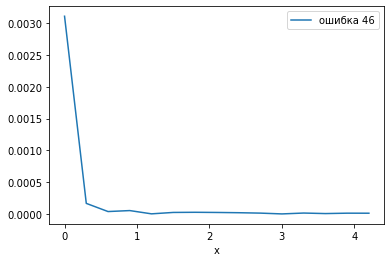

[4.198827283833535, 4.189453411685859, 4.1707475333790605, 4.142793193906578, 4.105715244134516, 4.059679283187366, 4.004890918842116, 3.9415948492340105, 3.870073769975274, 3.7906471115678824, 3.7036696127493975, 3.609529736143652, 3.5086479332923695, 3.4014747668165146, 3.2884888980942497, 3.170194949443027, 3.047121250353814, 2.9198174778433392, 2.7888522014630954, 2.654810343929701, 2.518290568718056, 2.379902606284936, 2.2402645308647555, 2.0999999999999996, 1.9597354691352453, 1.8200973937150646, 1.6817094312819443, 1.5451896560702993, 1.4111477985369052, 1.2801825221566612, 1.1528787496461859, 1.0298050505569731, 0.9115111019057507, 0.7985252331834862, 0.6913520667076312, 0.5904702638563488, 0.4963303872506031, 0.40935288843211803, 0.3299262300247263, 0.2584051507659899, 0.1951090811578846, 0.14032071681263458, 0.09428475586548402, 0.0572068060934221, 0.029252466620940165, 0.010546588314141125, 0.001172716166465193]
      x   si_f(x)  newton_polynomial(x)
0   0.0  0.000000      

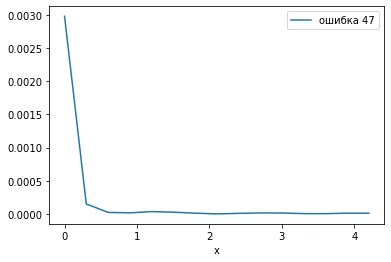

[4.198875633700368, 4.189887926011614, 4.1719509973782465, 4.145141656482401, 4.109574705037639, 4.065402446190384, 4.01281403233447, 3.9520346551315457, 3.883324581205816, 3.8069780376423923, 3.723321952061748, 3.632714552665455, 3.53554383424803, 3.4322258967436556, 3.3232031634223844, 3.208942486365773, 3.089933147334595, 2.966684762589229, 2.839725100634591, 2.7095978222343713, 2.576860152372184, 2.4420804941286365, 2.3058359946920772, 2.16871007392573, 2.0312899260742703, 1.8941640053079232, 1.7579195058713637, 1.623139847627816, 1.4904021777656296, 1.3602748993654097, 1.2333152374107714, 1.1100668526654047, 0.9910575136342272, 0.8767968365776158, 0.7677741032563448, 0.6644561657519701, 0.5672854473345457, 0.4766780479382524, 0.39302196235760833, 0.3166754187941845, 0.24796534486845467, 0.18718596766553053, 0.13459755380961602, 0.09042529496236185, 0.05485834351759955, 0.028049002621754138, 0.010112073988386872, 0.0011243662996318626]
      x   si_f(x)  newton_polynomial(x)
0   0.

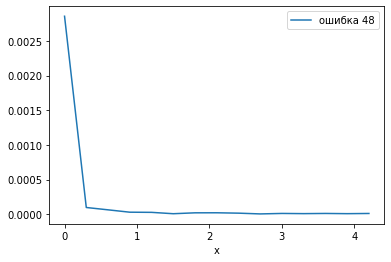

[4.1989210540214446, 4.190296137193316, 4.173081745170346, 4.14734861558183, 4.113202491376987, 4.070783686304497, 4.020266508333206, 3.9618585433833005, 3.895799802311227, 3.8223617346536076, 3.741846113182863, 3.654583793858163, 3.5609333562673218, 3.4612796301463558, 3.356032114031554, 3.2456232925421524, 3.1305068592082694, 3.011155852146872, 2.8880607102466858, 2.7617272578496035, 2.632674626209966, 2.5014331202728823, 2.368542039537463, 2.2345474619594974, 2.1, 1.9654525380405032, 1.8314579604625378, 1.698566879727118, 1.567325373790035, 1.4382727421503967, 1.3119392897533144, 1.188844147853128, 1.0694931407917312, 0.9543767074578482, 0.8439678859684465, 0.7387203698536442, 0.6390666437326786, 0.5454162061418377, 0.45815388681713776, 0.37763826534639255, 0.30420019768877316, 0.23814145661669972, 0.1797334916667941, 0.12921631369550357, 0.08679750862301239, 0.05265138441817019, 0.02691825482965493, 0.009703862806683894, 0.0010789459785556232]
      x   si_f(x)  newton_polynomial(x

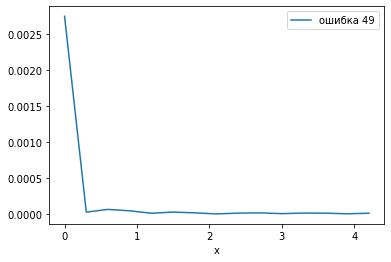

[4.198963776768037, 4.190680125666468, 4.174145515249789, 4.14942520007137, 4.1166167399215805, 4.075849614803873, 4.027284713936361, 3.9711137007955726, 3.907558256708282, 3.83686920597658, 3.7593255259889498, 3.675233246223965, 3.58492424049175, 3.4887549171796692, 3.387104812671251, 3.2803750934894746, 3.1689869730757794, 3.0533800494530485, 2.9340105703330392, 2.811349632515112, 2.6858813226823823, 2.55810080693274, 2.428512376584485, 2.29762745796888, 2.16596259406407, 2.0340374059359307, 1.90237254203112, 1.7714876234155152, 1.6418991930672613, 1.5141186773176187, 1.3886503674848882, 1.2659894296669605, 1.1466199505469519, 1.0310130269242204, 0.9196249065105255, 0.8128951873287491, 0.7112450828203314, 0.6150757595082503, 0.5247667537760352, 0.4406744740110502, 0.36313079402342074, 0.2924417432917181, 0.2288862992044276, 0.17271528606364006, 0.12415038519612653, 0.08338326007841967, 0.050574799928630565, 0.025854484750210904, 0.009319874333531875, 0.0010362232319636178]
      x   

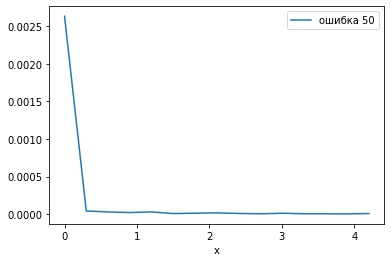

[4.199004011398069, 4.191041770219572, 4.175147491370645, 4.151381467295161, 4.1198338506629195, 4.080624312389682, 4.033901587684403, 3.979842911845631, 3.918653347947321, 3.850565008964351, 3.775836177288503, 3.694750324974885, 3.607615038435328, 3.51476085165777, 3.416539992377624, 3.3133250459573276, 3.2055075420424473, 3.093496469355621, 2.9777167242622453, 2.8586074989930212, 2.7366206156373916, 2.6122188122275922, 2.4858739874147977, 2.3580654103959, 2.22927790288128, 2.1, 1.97072209711872, 1.8419345896041004, 1.7141260125852027, 1.5877811877724084, 1.4633793843626086, 1.341392501006979, 1.2222832757377549, 1.1065035306443791, 0.9944924579575525, 0.8866749540426728, 0.783460007622377, 0.68523914834223, 0.5923849615646721, 0.5052496750251148, 0.424163822711497, 0.3494349910356489, 0.28134665205267884, 0.2201570881543693, 0.1660984123155973, 0.11937568761031736, 0.08016614933708022, 0.048618532704838735, 0.024852508629355174, 0.008958229780427374, 0.0009959886019315078]
      x   

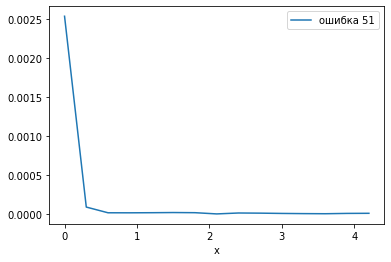

[4.19904194742802, 4.191382770995891, 4.176092365635823, 4.153226524378779, 4.122868682199784, 4.085129611572745, 4.040147018273702, 3.9880850389073945, 3.9291336419905827, 3.8635079347775356, 3.7914473783569864, 3.713214913884589, 3.629096003139156, 3.5393975869035836, 3.444446964971225, 3.344590601864436, 3.2401928626231054, 3.1316346832761432, 3.019312180847215, 2.9036352079666887, 2.785025857363826, 2.6639169216961918, 2.54075031433618, 2.4159754568770446, 2.2900476392422395, 2.163426358381867, 2.0365736416181335, 1.9099523607577606, 1.784024543122956, 1.6592496856638204, 1.5360830783038089, 1.4149741426361744, 1.2963647920333117, 1.180687819152785, 1.068365316723858, 0.9598071373768948, 0.855409398135565, 0.7555530350287754, 0.6606024130964163, 0.570903996860844, 0.48678508611541105, 0.4085526216430133, 0.3364920652224648, 0.2708663580094177, 0.21191496109260521, 0.15985298172629792, 0.11487038842725572, 0.07713131780021598, 0.04677347562122147, 0.023907634364177976, 0.00861722900

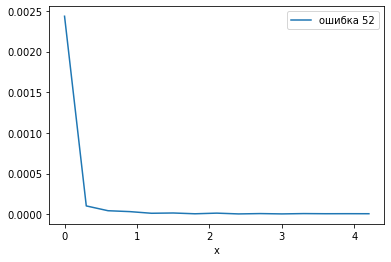

[4.199077756668468, 4.191704669491956, 4.176984393376545, 4.154968633828958, 4.125734722007554, 4.089385343093802, 4.046048175606851, 3.9958754429280616, 3.9390433786108376, 3.875751607353835, 3.806222443811931, 3.7307001117078897, 3.649449885987628, 3.5627571610322937, 3.470926448200095, 3.3742803062190463, 3.2731582081876702, 3.167915349163363, 3.058921398526798, 2.946559201504742, 2.8312234344122382, 2.7133192183376496, 2.593260696140066, 2.471469577757403, 2.3483736589348685, 2.2244053185768, 2.1, 1.9755946814232, 1.8516263410651321, 1.7285304222425972, 1.6067393038599345, 1.486680781662351, 1.3687765655877628, 1.2534407984952587, 1.1410786014732026, 1.0320846508366368, 0.9268417918123302, 0.8257196937809539, 0.729073551799905, 0.6372428389677063, 0.550550114012373, 0.46929988829211045, 0.3937775561880692, 0.32424839264616545, 0.26095662138916276, 0.20412455707193877, 0.15395182439314992, 0.1106146569061981, 0.07426527799244687, 0.04503136617104175, 0.023015606623455476, 0.00829533

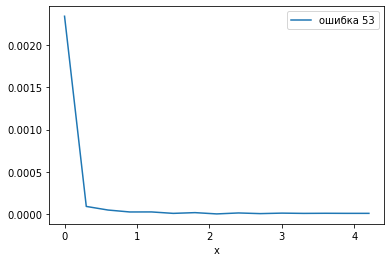

[4.199111595172621, 4.1920088659926655, 4.177827441019984, 4.156615305707659, 4.128444235207043, 4.093409551503371, 4.051629800876327, 4.003246352776965, 3.948422921478233, 3.8873450121176996, 3.820219293006883, 3.747272896331109, 3.668752649606092, 3.58492424049175, 3.4960713177892697, 3.402494531663346, 3.3045105163371966, 3.2024508187025766, 3.096660776470045, 2.987498349655469, 2.8753329093566378, 2.7605439879183886, 2.6435199947152936, 2.5246569018972798, 2.4043569045452187, 2.283027059770083, 2.161077909360534, 2.038922090639466, 1.9169729402299183, 1.7956430954547822, 1.6753430981027204, 1.5564800052847063, 1.4394560120816116, 1.3246670906433629, 1.2125016503445316, 1.103339223529955, 0.997549181297424, 0.8954894836628038, 0.7975054683366543, 0.7039286822107305, 0.6150757595082503, 0.5312473503939084, 0.45272710366889113, 0.3797807069931176, 0.3126549878823006, 0.25157707852176703, 0.19675364722303557, 0.14837019912367277, 0.10659044849662891, 0.07155576479295656, 0.043384694292

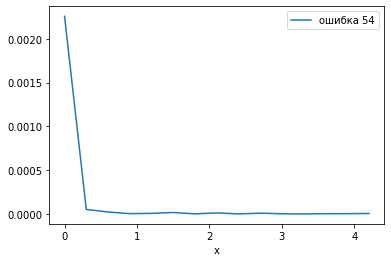

[4.199143604939198, 4.192296634811652, 4.178625027949959, 4.158173378294027, 4.13100839487411, 4.097218684219823, 4.05691446134405, 4.010227190244489, 3.9573091550954103, 3.898332963528337, 3.833490983621825, 3.7629947164367783, 3.6870741061439425, 3.6059767899938233, 3.519967290575441, 3.4293261529986276, 3.334349029814194, 3.235345716656755, 3.132639141755768, 3.0265643126107653, 2.9174672232665224, 2.8057037257524033, 2.6916383693670025, 2.5756432115941053, 2.45809660452851, 2.3393819607701354, 2.219886502811813, 2.1, 1.9801134971881877, 1.860618039229865, 1.74190339547149, 1.6243567884058947, 1.508361630632998, 1.394296274247597, 1.282532776733478, 1.1734356873892355, 1.0673608582442327, 0.9646542833432452, 0.8656509701858066, 0.7706738470013725, 0.6800327094245597, 0.5940232100061769, 0.5129258938560579, 0.43700528356322255, 0.36650901637817457, 0.3016670364716634, 0.24269084490458992, 0.18977280975551136, 0.1430855386559502, 0.10278131578017735, 0.06899160512589031, 0.04182662170

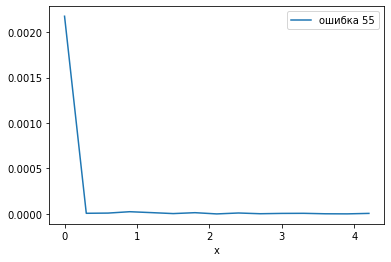

[4.199173915404411, 4.192569137647, 4.179380363206536, 4.159649088846784, 4.133437396456749, 4.100827757718083, 4.06192277461866, 4.0168448566287696, 3.9657358355556322, 3.908756519288059, 3.846086185835345, 3.777922019252323, 3.7044784892253757, 3.6259866762714568, 3.5426935446732934, 3.454861165438384, 3.362765891726652, 3.2666974893411647, 3.166958225017712, 3.063861915381829, 2.957732939565592, 2.8489052185908577, 2.737721164730191, 2.6245306041511767, 2.5096896762338696, 2.393559713024549, 2.27650610235142, 2.158897138179325, 2.0411028618206752, 1.9234938976485805, 1.8064402869754512, 1.690310323766131, 1.575469395848824, 1.4622788352698093, 1.351094781409143, 1.2422670604344082, 1.1361380846181715, 1.0330417749822887, 0.9333025106588353, 0.8372341082733477, 0.7451388345616166, 0.6573064553267065, 0.5740133237285432, 0.4955215107746247, 0.4220779807476769, 0.3539138141646554, 0.2912434807119417, 0.23426416444436793, 0.18315514337123062, 0.13807722538134026, 0.0991722422819179, 0.0

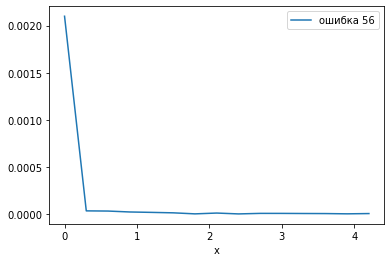

[4.199202644752399, 4.1928274353140065, 4.1800963777387565, 4.161048135830077, 4.135740558472595, 4.104250503946966, 4.066673606513815, 4.023123985975621, 3.973733901098628, 3.9186533479473216, 3.85804960435131, 3.792106721888054, 3.721024966924274, 3.645020212413576, 3.5643232822973907, 3.4791792505002426, 3.3898466966483025, 3.2965969207715595, 3.199713119374544, 3.0994895253778547, 2.996230514542448, 2.890249681090455, 2.7818688853298355, 2.6714172761752035, 2.5592302915333893, 2.4456486395895416, 2.3310172640875666, 2.215684296747318, 2.1, 1.9843157032526828, 1.8689827359124336, 1.754351360410459, 1.6407697084666113, 1.5285827238247967, 1.4181311146701647, 1.3097503189095456, 1.2037694854575522, 1.1005104746221455, 1.0002868806254566, 0.9034030792284411, 0.8101533033516977, 0.7208207494997576, 0.6356767177026097, 0.5549797875864242, 0.4789750330757261, 0.407893278111946, 0.34195039564869045, 0.28134665205267884, 0.22626609890137295, 0.17687601402437925, 0.13332639348618502, 0.09574

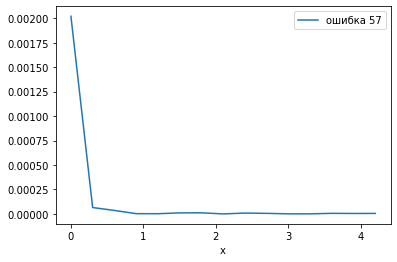

[4.199229901068897, 4.193072498076468, 4.180775752815494, 4.162375733758528, 4.137926411331744, 4.107499499610385, 4.071184245969016, 4.029087169303606, 3.981331747593245, 3.928058055717962, 3.8694223545949633, 3.805596632838444, 3.7367681022873427, 3.663138648880768, 3.58492424049175, 3.5023542934562606, 3.415670999655572, 3.3251286161257374, 3.230992719277899, 3.133539425916916, 3.0330545833431977, 2.9298329309133266, 2.8241772355187384, 2.716397403518263, 2.606809571729382, 2.4957351801444685, 2.3835000290919095, 2.2704333236076057, 2.156866707819883, 2.043133292180118, 1.9295666763923947, 1.8164999709080907, 1.704264819855532, 1.5931904282706184, 1.4836025964817372, 1.3758227644812622, 1.270167069086674, 1.166945416656803, 1.0664605740830846, 0.9690072807221013, 0.8748713838742634, 0.7843290003444277, 0.6976457065437391, 0.6150757595082503, 0.5368613511192324, 0.4632318977126577, 0.394403367161557, 0.3305776454050371, 0.27194194428203877, 0.21866825240675536, 0.1709128306963943, 0.

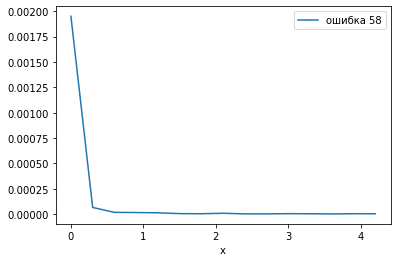

[4.19925578335925, 4.1933052147645755, 4.181420945108416, 4.163636661644294, 4.140002775855891, 4.110586280560211, 4.07547056000917, 4.034755153527867, 3.9885554733595603, 3.937002477517119, 3.8802422985683096, 3.8184358294071554, 3.7517582671855494, 3.6803986166978913, 3.604559154626462, 3.524454856166194, 3.4403127856541222, 3.3523714529308535, 3.260880137258506, 3.1660981807115642, 3.0682942530435846, 2.9677455901135943, 2.864737208030927, 2.7595610952460925, 2.652515384877795, 2.5439035096222113, 2.4340333416400513, 2.3232163198594673, 2.211766567168576, 2.1, 1.988233432831425, 1.8767836801405324, 1.765966658359949, 1.6560964903777893, 1.5474846151222055, 1.4404389047539077, 1.335262791969074, 1.2322544098864059, 1.1317057469564156, 1.0339018192884357, 0.9391198627414945, 0.8476285470691469, 0.7596872143458777, 0.6755451438338069, 0.595440845373538, 0.5196013833021091, 0.44824173281445123, 0.381564170592845, 0.319757701431691, 0.26299752248288133, 0.2114445266404399, 0.165244846472

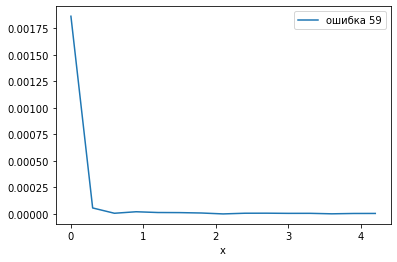

[4.19928038244867, 4.193526400839569, 4.1820342088850015, 4.164835305884305, 4.141976832835121, 4.113521443223206, 4.079547131293575, 4.040147018273702, 3.9954290971347075, 3.9455159365901276, 3.890544345143594, 3.830664996106233, 3.7660420146115943, 3.696852527760065, 3.623286179125804, 3.5455446089568836, 3.463840901493386, 3.3783990009183134, 3.289453097542149, 3.197246985903493, 3.102033396545178, 3.00407330329742, 2.9036352079666887, 2.800994404390919, 2.696432223878238, 2.5902352640974016, 2.48269460353351, 2.374105003662108, 2.2647641010284745, 2.1549715914465337, 2.045028408553467, 1.935235898971526, 1.825894996337892, 1.7173053964664908, 1.6097647359025988, 1.5035677761217625, 1.3990055956090814, 1.2963647920333117, 1.1959266967025808, 1.0979666034548223, 1.0027530140965075, 0.9105469024578505, 0.8216009990816866, 0.7361590985066147, 0.6544553910431163, 0.576713820874196, 0.5031474722399352, 0.4339579853884059, 0.3693350038937675, 0.30945565485640647, 0.25448406340987284, 0.20

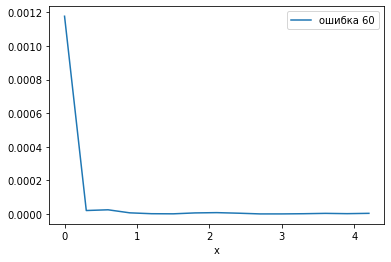

[4.199303781780058, 4.193736805541906, 4.182617615685814, 4.1659756983043845, 4.143855184770803, 4.116314734710364, 4.083427380445689, 4.04528033332814, 4.001974752468991, 3.9536254764836496, 3.900360718960298, 3.8423217284605, 3.779662413953411, 3.7125489366768605, 3.641159269507618, 3.5656827250093217, 3.4863194534095867, 3.403279911837588, 3.316784306229584, 3.2270620073823615, 3.134350942703116, 3.0388969652687394, 2.94095320186766, 2.840779381753099, 2.7386411478877877, 2.6348093525065805, 2.5295593388650217, 2.42317021107853, 2.3159240939884573, 2.208105385017728, 2.1, 1.9918946149822723, 1.8840759060115435, 1.7768297889214704, 1.6704406611349782, 1.5651906474934196, 1.461358852112213, 1.3592206182469013, 1.2590467981323408, 1.1611030347312603, 1.065649057296885, 0.9729379926176391, 0.8832156937704163, 0.7967200881624128, 0.713680546590413, 0.6343172749906789, 0.5588407304923821, 0.4874510633231399, 0.42033758604658944, 0.3576782715395004, 0.2996392810397024, 0.24637452351635059,

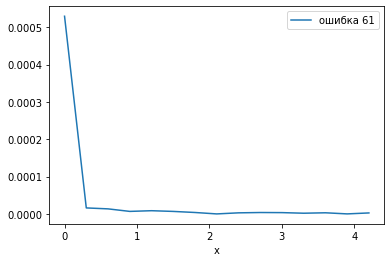

[4.199326058122504, 4.1939371182400595, 4.183173071806561, 4.167061549974822, 4.145643910790313, 4.118975133025646, 4.087123675050858, 4.050171299101751, 4.008212861397412, 3.9613560686456575, 3.9097212015614544, 3.853440806108056, 3.792659353253411, 3.7275328681152633, 3.658228529446913, 3.58492424049175, 3.5078081723081853, 3.4270782807372386, 3.3429417982527365, 3.255614701998522, 3.165321159378226, 3.072292952620754, 2.976768883798633, 2.8789941618265122, 2.7792197730134003, 2.6777018367844043, 2.5747009482258436, 2.470481509141398, 2.365311049336472, 2.2594595398730175, 2.1531987000576946, 2.0468012999423055, 1.9405404601269833, 1.834688950663529, 1.7295184908586023, 1.6252990517741568, 1.5222981632155965, 1.4207802269866, 1.321005838173488, 1.2232311162013672, 1.1277070473792463, 1.0346788406217742, 0.9443852980014782, 0.8570582017472643, 0.7729217192627618, 0.6921918276918155, 0.6150757595082503, 0.5417714705530872, 0.47246713188473666, 0.4073406467465892, 0.34655919389194456, 0

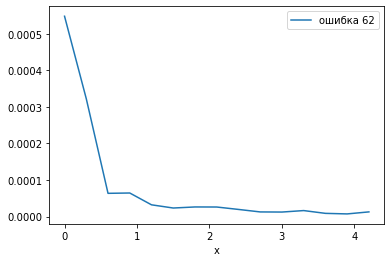

[4.199347282201714, 4.194127974080478, 4.183702333860362, 4.168096281325637, 4.14734861558183, 4.121510918595026, 4.0906474269509765, 4.05483487215283, 4.0141622898545135, 3.968730798504084, 3.918653347947321, 3.8640544386166202, 3.805069812003299, 3.741846113182863, 3.674540526232242, 3.603320383445409, 3.528362749318931, 3.4498539803417327, 3.3679892616835025, 3.2829721219336063, 3.195013927096946, 3.1043333551047683, 3.011155852146872, 2.9157130721768594, 2.8182423009839046, 2.718985866262899, 2.6181905351496164, 2.516106900718735, 2.412988758969967, 2.309092477851215, 2.2046763598874644, 2.1, 1.9953236401125363, 1.8909075221487854, 1.787011241030034, 1.683893099281265, 1.5818094648503838, 1.4810141337371012, 1.3817576990160958, 1.2842869278231412, 1.188844147853128, 1.0956666448952317, 1.0049860729030542, 0.9170278780663943, 0.832010738316497, 0.7501460196582674, 0.6716372506810697, 0.5966796165545913, 0.5254594737677587, 0.45815388681713776, 0.3949301879967013, 0.33594556138338016

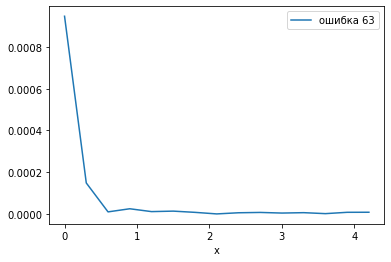

[4.1993675192620294, 4.194309959025249, 4.184207022657291, 4.169083049016777, 4.14897447308091, 4.123929738170424, 4.094009179245377, 4.059284877552952, 4.019840486977415, 3.9757710325105826, 3.9271826813282944, 3.874192487024385, 3.8169281076183257, 3.7555274980158733, 3.6901385776636175, 3.6209188741980807, 3.548035143947841, 3.4716629702029316, 3.3919863402193164, 3.3091972019774754, 3.2234950017629043, 3.1350862036825466, 3.0441837922746737, 2.951006759410479, 2.8557795767234753, 2.7587316548376726, 2.6600967906972866, 2.5601126043294267, 2.459019966396633, 2.357062417918354, 2.2544855835593016, 2.151536579898116, 2.0484634201018848, 1.9455144164406988, 1.842937582081646, 1.7409800336033674, 1.6398873956705737, 1.5399032093027136, 1.441268345162328, 1.344220423276525, 1.2489932405895217, 1.155816207725326, 1.0649137963174538, 0.9765049982370964, 0.8908027980225248, 0.808013659780684, 0.7283370297970693, 0.6519648560521594, 0.5790811258019197, 0.5098614223363822, 0.4444725019841269,

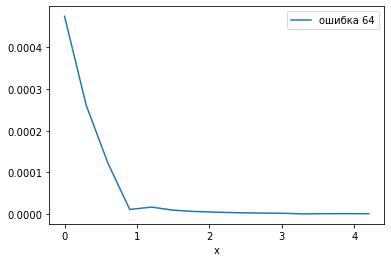

[4.199386829568406, 4.194483614352132, 4.184688635605914, 4.170024769956467, 4.150526265541472, 4.126238662021459, 4.097218684219823, 4.063534109639371, 4.025263610164823, 3.982496568320978, 3.935332868515688, 3.8838826637551946, 3.8282661183766784, 3.768613127398884, 3.7050630131462814, 3.637764199855325, 3.5668738670227675, 3.49255758230567, 3.4149889148304586, 3.334349029814194, 3.2508262654448075, 3.16461569300854, 3.0759186612919143, 2.984942326322311, 2.891899167545473, 2.79700649156991, 2.7004859246372472, 2.6025628950038717, 2.503466106442788, 2.4034270040953647, 2.302679233920482, 2.201458097003565, 2.1, 1.9985419029964355, 1.8973207660795184, 1.796572995904635, 1.6965338935572127, 1.597437104996129, 1.499514075362753, 1.4029935084300904, 1.3081008324545274, 1.2150576736776884, 1.1240813387080861, 1.0353843069914608, 0.9491737345551925, 0.8656509701858066, 0.785011085169542, 0.7074424176943299, 0.6331261329772326, 0.5622358001446757, 0.49493698685371834, 0.4313868726011163, 0.

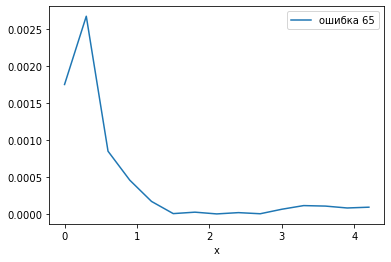

[4.199405268855571, 4.194649440681532, 4.185148557813905, 4.170924142808192, 4.152008418539435, 4.128444235207043, 4.100284973265307, 4.0675944224995, 4.030446637521498, 3.988925770012267, 3.943125878091237, 3.8931507132444114, 3.839113485293879, 3.781136605941157, 3.719351411465314, 3.6538978652040566, 3.58492424049175, 3.5125867847726306, 3.4370493656500853, 3.358483099673829, 3.2770659647058773, 3.192982396743452, 3.1064228721121196, 3.017583475975655, 2.9266654581400773, 2.8338747771581065, 2.739421633766805, 2.6435199947152936, 2.5463871080612517, 2.448243011034186, 2.349310031580341, 2.249812284718388, 2.1499751648468264, 2.0500248351531747, 1.9501877152816123, 1.8506899684196594, 1.7517569889658149, 1.6536128919387494, 1.5564800052847068, 1.4605783662331955, 1.3661252228418936, 1.273334541859923, 1.1824165240243454, 1.0935771278878814, 1.0070176032565485, 0.9229340352941231, 0.8415169003261722, 0.7629506343499151, 0.6874132152273704, 0.6150757595082503, 0.5461021347959443, 0.480

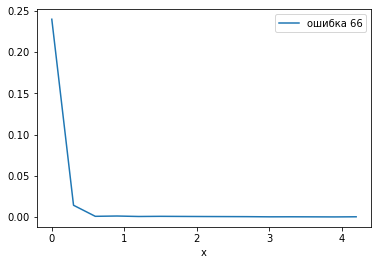

[4.199422888730614, 4.1948079015864215, 4.185588072041364, 4.171783667281748, 4.153425032385185, 4.130552523615527, 4.103216419711036, 4.071476811360812, 4.035403469112409, 3.995075690001036, 3.95058212323746, 3.9020205753378034, 3.8494977951235922, 3.793129239064683, 3.733038817480879, 3.669358622160162, 3.602228635992268, 3.5317964252559193, 3.4582168152361175, 3.3816515498845634, 3.3022689362713513, 3.220243474609498, 3.135755474665606, 3.0489906593998612, 2.9601397567066634, 2.869398080153317, 2.776965099638423, 2.6830440029137512, 2.5878412489334655, 2.4915661140125307, 2.39443023179196, 2.296647128022137, 2.1984317511868747, 2.1, 2.001568248813126, 1.9033528719778636, 1.8055697682080403, 1.7084338859874697, 1.6121587510665356, 1.5169559970862487, 1.4230349003615774, 1.330601919846683, 1.2398602432933368, 1.1510093406001394, 1.0642445253343946, 0.9797565253905021, 0.8977310637286495, 0.8183484501154368, 0.7417831847638827, 0.6682035747440807, 0.5977713640077327, 0.5306413778398382

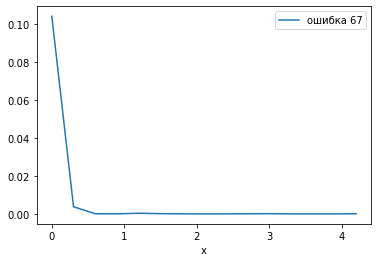

[4.199439737034439, 4.1949594268338055, 4.186008367640295, 4.172605661465316, 4.154779910359279, 4.132569155373378, 4.106020795378068, 4.075191485911493, 4.040147018273702, 4.000962179124713, 3.9577205908859963, 3.910514533286027, 3.8594447464306825, 3.8046202158187885, 3.746157939761567, 3.6841826797023445, 3.618826693969347, 3.5502294555297604, 3.4785373543473894, 3.4039033849791, 3.3264868200767213, 3.246452870491183, 3.1639723327042306, 3.079221224340131, 2.9923804085351864, 2.9036352079666887, 2.813175009364989, 2.7211928593526675, 2.6278850524733164, 2.533450712289084, 2.4380913664409674, 2.342010516578665, 2.2454132040778028, 2.1485055724713025, 2.051494427528698, 1.9545867959221976, 1.8579894834213353, 1.7619086335590333, 1.6665492877109167, 1.5721149475266842, 1.4788071406473327, 1.3868249906350112, 1.2963647920333117, 1.2076195914648147, 1.1207787756598688, 1.0360276672957696, 0.953547129508818, 0.8735131799232787, 0.7960966150209001, 0.7214626456526108, 0.6497705444702404, 0

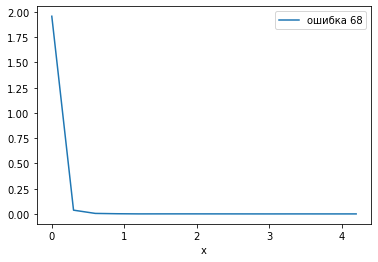

[4.199455858166834, 4.195104415300133, 4.186410548596566, 4.1733922774224865, 4.156076584132878, 4.134499358146304, 4.108705321558603, 4.078747936449523, 4.0446892940743915, 4.006599986170507, 3.964558958644988, 3.9186533479473216, 3.8689783004657645, 3.8156367753219285, 3.758739330972273, 3.698403896058826, 3.634755524984061, 3.567926138716553, 3.4980542513646258, 3.425284683084711, 3.3497682599194585, 3.2716615011877304, 3.191126295074411, 3.108329563092423, 3.023442914112403, 2.9366422886771075, 2.8481075943377756, 2.758022332768253, 2.6665732194297513, 2.5739497965745426, 2.4803440403906976, 2.385949963102118, 2.290963210848579, 2.195580658179224, 2.1, 2.0044193418207765, 1.909036789151422, 1.8140500368978825, 1.719655959609303, 1.6260502034254578, 1.5334267805702493, 1.4419776672317473, 1.351892405662225, 1.2633577113228935, 1.1765570858875978, 1.0916704369075776, 1.00887370492559, 0.92833849881227, 0.8502317400805419, 0.7747153169152889, 0.7019457486353748, 0.632073861283448, 0.5

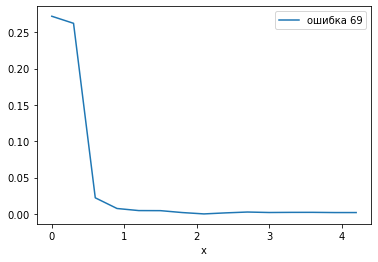

[4.199471293379264, 4.195243237597558, 4.186795640775809, 4.174145515249789, 4.157318336688794, 4.136347992791043, 4.111276715038354, 4.082154993647572, 4.049041475889982, 4.0120028479835135, 3.9711137007955726, 3.926456379626961, 3.878120818379397, 3.826204358440611, 3.7708115526517405, 3.7120539547518234, 3.6500498947234155, 3.58492424049175, 3.516808146457356, 3.445838789368551, 3.372159092065722, 3.2959174356537497, 3.217267360682207, 3.1363672579351283, 3.0533800494530485, 2.9684728604296935, 2.881816682644085, 2.793586030105851, 2.7039585876072367, 2.6131148528895776, 2.521237773144873, 2.428512376584485, 2.335125399816947, 2.2412649117852834, 2.1471199350211907, 2.05288006497881, 1.958735088214717, 1.8648746001830536, 1.7714876234155152, 1.6787622268551274, 1.5868851471104226, 1.4960414123927634, 1.4064139698941494, 1.3181833173559157, 1.2315271395703062, 1.1466199505469519, 1.0636327420648717, 0.9827326393177935, 0.9040825643462509, 0.8278409079342786, 0.7541612106314493, 0.683

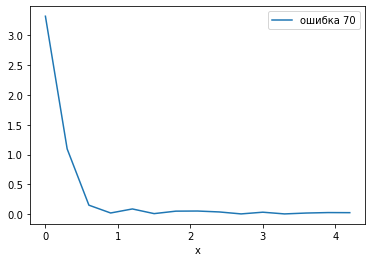

[4.19948608103901, 4.1953762384434, 4.187164598462057, 4.1748672357658645, 4.158508223019786, 4.138119583759492, 4.113741229703784, 4.085420882625538, 4.053213980934082, 4.017183571151916, 3.9774001844981792, 3.933941698820475, 3.886893186145331, 3.8363467461457086, 3.782401325851571, 3.7251625259564247, 3.664742394099, 3.601259205524742, 3.5348372315564562, 3.465606496327368, 3.3937025222527653, 3.319266064738514, 3.242442836645738, 3.163383223051052, 3.082241986860712, 2.9991779658549564, 2.914353761755595, 2.827935421925501, 2.740092114323102, 2.6509957963481563, 2.5608208782270676, 2.469743881596676, 2.3779430939548676, 2.2855982196544193, 2.1928900281232955, 2.1, 2.0071099718767047, 1.914401780345581, 1.822056906045133, 1.7302561184033238, 1.6391791217729335, 1.5490042036518439, 1.4599078856768983, 1.3720645780744998, 1.2856462382444054, 1.2008220341450442, 1.1177580131392886, 1.0366167769489476, 0.957557163354263, 0.8807339352614867, 0.8062974777472356, 0.734393503672633, 0.66516

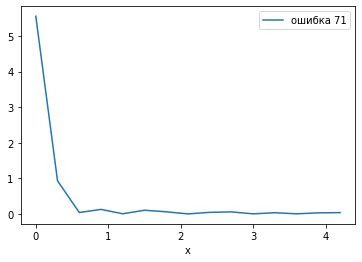

In [87]:
plot_df_с = pd.DataFrame(columns=['Количество узлов', 'Макс.погрешность'])
for i in range(15, 72): 
    X = chebyshev_roots_nodes(a, b, i)
    print(X)
    Y = [si_f(node,e) for node in X]
    newton_polynomial_x = [newton_polynomial(X, Y, node) for node in x]
    
    errors = [abs(y1 - y2) for y1, y2 in zip(si_x, newton_polynomial_x)]
    
    plot_df_с = plot_df_с.append({'Количество узлов' : i, 'Макс.погрешность' : max(errors)}, ignore_index=True)
    
    plot_otr_df = pd.DataFrame(columns=['x', 'ошибка'])
    plot_otr_df['x'] = x
    plot_otr_df[f'ошибка {i}'] = np.array(errors)
    
    plot_otr_df.plot(x='x', y=f'ошибка {i}')
    
    
    print(pd.DataFrame(data={'x': x, 'si_f(x)': si_x, 'newton_polynomial(x)': newton_polynomial_x}))
    plt.show()

In [88]:
plot_df_с.head(55)

,Количество узлов,Макс.погрешность
0,15.0,0.014634
1,16.0,0.012865
2,17.0,0.011398
3,18.0,0.010168
4,19.0,0.009127
5,20.0,0.008238
6,21.0,0.007473
7,22.0,0.006810
8,23.0,0.006231
9,24.0,0.005723


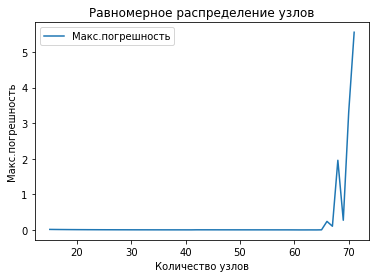

In [89]:
axis = plot_df_с.plot(x='Количество узлов', y='Макс.погрешность')
axis.set_title('Равномерное распределение узлов')
axis.set_xlabel('Количество узлов')
axis.set_ylabel('Макс.погрешность')
plt.show()

# 3 Task

In [24]:
def f(x):
    return 1 if (x==0) else math.sin(x)/x

In [25]:
def right_rectangles(a, b, n):
    s = 0
    h = (b - a) / (n - 1)
    z = np.linspace(a, b, n)
    for i in range(1, n):
        s += f(z[i])
    s *= h
    
    return s

In [26]:
def left_rectangles(a, b, n):
    s = 0
    h = (b - a) / (n - 1)
    z = np.linspace(a, b, n)
    for i in range(1, n):
        s += f(z[i - 1])
    s *= h
    
    return s

In [27]:
def central_rectangles(a, b, n):
    s = 0
    h = (b - a) / (n - 1)
    z = np.linspace(a, b, n)
    for i in range(1, n):
        s += f((z[i] + z[i - 1]) / 2)
    s *= h
    
    return s

In [28]:
def trapeze(a, b, n):
    s = 0
    h = (b - a) / (n - 1)
    z = np.linspace(a, b, n)
    for i in range(1, n):
        s += f(z[i - 1]) + f(z[i])
    s *= h / 2
    
    return s

In [29]:
def simpson(a, b, n):
    s = 0
    h = (b - a) / (n - 1)
    z = np.linspace(a, b, n)
    for i in range(1, n):
        s += f(z[i - 1]) + 4 * f((z[i] + z[i - 1]) / 2) + f(z[i])
    s *= h / 6
    
    return s

In [30]:
def gauss(a, b, n):
    const = 1 / np.sqrt(3)
    s = 0
    h = (b - a) / (n - 1)
    z = np.linspace(a, b, n)
    for i in range(1, n):
        s += f(z[i - 1] + h * (1 - const) / 2) + f(z[i - 1] + h * (1 + const) / 2)
    s *= h / 2
    
    return s

In [31]:
eps1 = 1e-2
eps2 = 1e-3
eps3 = 1e-4
eps4 = 1e-5
eps5 = 1e-6
eps6 = 1e-7



def task3(integrate, a, b, eps):
    df3 = pd.DataFrame(columns=['x', 'S(x)', 'N', 'погрешность'])
    for x in df['x']:
        n = 2
        S1 = 0
        S2 = 0
        while True:
            S1 = integrate(a, x, n)
            if abs(S1 - S2) <= eps:
                break
            S2 = S1
            n *= 2
        df3 = df3.append({'x' : x, 'S(x)' : S1, 'N': n, 'погрешность': abs(S1 - si_f(x,e))}, ignore_index=True)
    return df3.head(20)

# ***right_rectangles***

In [32]:
task3(right_rectangles, a, b, eps1)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.297675,4.0,0.000829
2,0.6,0.585485,8.0,0.002644
3,0.9,0.856499,16.0,0.003972
4,1.2,1.103682,32.0,0.004365
5,1.5,1.316501,32.0,0.008182
6,1.8,1.499231,64.0,0.006586
7,2.1,1.643819,128.0,0.004879
8,2.4,1.745683,128.0,0.006802
9,2.7,1.809250,128.0,0.008962


In [33]:
task3(right_rectangles, a, b, eps2)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.298169,8.0,0.000335
2,0.6,0.587553,32.0,0.000576
3,0.9,0.859540,64.0,0.000931
4,1.2,1.107521,256.0,0.000526
5,1.5,1.323697,256.0,0.000986
6,1.8,1.505008,512.0,0.000809
7,2.1,1.648094,1024.0,0.000605
8,2.4,1.751642,1024.0,0.000843
9,2.7,1.817657,2048.0,0.000555


In [34]:
task3(right_rectangles, a, b, eps3)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.298431,32.0,0.000073
2,0.6,0.588059,256.0,0.000069
3,0.9,0.860414,1024.0,0.000057
4,1.2,1.107982,2048.0,0.000065
5,1.5,1.324622,4096.0,0.000061
6,1.8,1.505766,8192.0,0.000050
7,2.1,1.648623,8192.0,0.000075
8,2.4,1.752433,16384.0,0.000053
9,2.7,1.818143,16384.0,0.000069


In [35]:
task3(right_rectangles, a, b, eps4)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.298495,256.0,0.000009
2,0.6,0.588120,2048.0,0.000009
3,0.9,0.860464,8192.0,0.000007
4,1.2,1.108039,16384.0,0.000008
5,1.5,1.324676,32768.0,0.000008
6,1.8,1.505810,65536.0,0.000006
7,2.1,1.648689,65536.0,0.000009
8,2.4,1.752479,131072.0,0.000007
9,2.7,1.818203,131072.0,0.000009


# ***left_rectangles***

In [36]:
task3(left_rectangles, a, b, eps1)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.299168,4.0,0.000664
2,0.6,0.593379,4.0,0.005250
3,0.9,0.868424,8.0,0.007953
4,1.2,1.116795,16.0,0.008748
5,1.5,1.332711,32.0,0.008028
6,1.8,1.512345,64.0,0.006528
7,2.1,1.653558,128.0,0.004859
8,2.4,1.759262,128.0,0.006777
9,2.7,1.827145,128.0,0.008933


In [37]:
task3(left_rectangles, a, b, eps2)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.299168,4.0,0.000664
2,0.6,0.588693,32.0,0.000564
3,0.9,0.861392,64.0,0.000921
4,1.2,1.108572,256.0,0.000525
5,1.5,1.325668,256.0,0.000984
6,1.8,1.506625,512.0,0.000808
7,2.1,1.649303,1024.0,0.000604
8,2.4,1.753328,1024.0,0.000843
9,2.7,1.818767,2048.0,0.000555


In [38]:
task3(left_rectangles, a, b, eps3)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.298576,32.0,0.000071
2,0.6,0.588198,256.0,0.000069
3,0.9,0.860528,1024.0,0.000057
4,1.2,1.108113,2048.0,0.000065
5,1.5,1.324745,4096.0,0.000061
6,1.8,1.505867,8192.0,0.000050
7,2.1,1.648774,8192.0,0.000075
8,2.4,1.752538,16384.0,0.000053
9,2.7,1.818281,16384.0,0.000069


In [39]:
task3(left_rectangles, a, b, eps4)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.298513,256.0,0.000009
2,0.6,0.588137,2048.0,0.000009
3,0.9,0.860478,8192.0,0.000007
4,1.2,1.108055,16384.0,0.000008
5,1.5,1.324691,32768.0,0.000008
6,1.8,1.505823,65536.0,0.000006
7,2.1,1.648708,65536.0,0.000009
8,2.4,1.752492,131072.0,0.000007
9,2.7,1.818221,131072.0,0.000009


# ***central_rectangles***

In [40]:
task3(central_rectangles, a, b, eps1)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.298545,4.0,0.000041
2,0.6,0.588451,4.0,0.000322
3,0.9,0.861509,4.0,0.001038
4,1.2,1.108470,8.0,0.000423
5,1.5,1.325442,8.0,0.000759
6,1.8,1.506994,8.0,0.001177
7,2.1,1.650336,8.0,0.001638
8,2.4,1.754568,8.0,0.002083
9,2.7,1.818743,16.0,0.000531


In [41]:
task3(central_rectangles, a, b, eps2)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.298545,4.0,0.000041
2,0.6,0.588188,8.0,0.000059
3,0.9,0.860661,8.0,0.000190
4,1.2,1.108139,16.0,0.000092
5,1.5,1.324849,16.0,0.000165
6,1.8,1.506073,16.0,0.000256
7,2.1,1.648782,32.0,0.000083
8,2.4,1.752592,32.0,0.000106
9,2.7,1.818336,32.0,0.000124


In [42]:
task3(central_rectangles, a, b, eps3)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.298512,8.0,0.000008
2,0.6,0.588142,16.0,0.000013
3,0.9,0.860480,32.0,0.000010
4,1.2,1.108069,32.0,0.000022
5,1.5,1.324693,64.0,0.000009
6,1.8,1.505831,64.0,0.000015
7,2.1,1.648719,64.0,0.000020
8,2.4,1.752511,64.0,0.000026
9,2.7,1.818242,64.0,0.000030


In [43]:
task3(central_rectangles, a, b, eps4)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298506,16.0,1.651726e-06
2,0.6,0.588132,32.0,3.010820e-06
3,0.9,0.860473,64.0,2.350285e-06
4,1.2,1.108048,128.0,1.284463e-06
5,1.5,1.324686,128.0,2.302765e-06
6,1.8,1.505818,256.0,8.860775e-07
7,2.1,1.648700,256.0,1.232467e-06
8,2.4,1.752487,256.0,1.566841e-06
9,2.7,1.818214,256.0,1.837998e-06


# ***trapeze***

In [44]:
task3(trapeze, a, b, eps1)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.298421,4.0,0.000083
2,0.6,0.587486,4.0,0.000643
3,0.9,0.860090,8.0,0.000381
4,1.2,1.107201,8.0,0.000846
5,1.5,1.323167,8.0,0.001517
6,1.8,1.505305,16.0,0.000512
7,2.1,1.647986,16.0,0.000712
8,2.4,1.751580,16.0,0.000906
9,2.7,1.817149,16.0,0.001063


In [45]:
task3(trapeze, a, b, eps2)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.298421,4.0,0.000083
2,0.6,0.588011,8.0,0.000118
3,0.9,0.860388,16.0,0.000083
4,1.2,1.107863,16.0,0.000184
5,1.5,1.324606,32.0,0.000077
6,1.8,1.505697,32.0,0.000120
7,2.1,1.648532,32.0,0.000167
8,2.4,1.752273,32.0,0.000212
9,2.7,1.817963,32.0,0.000249


In [46]:
task3(trapeze, a, b, eps3)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000
1,0.3,0.298489,8.0,0.000015
2,0.6,0.588103,16.0,0.000026
3,0.9,0.860451,32.0,0.000019
4,1.2,1.108037,64.0,0.000010
5,1.5,1.324665,64.0,0.000019
6,1.8,1.505788,64.0,0.000029
7,2.1,1.648689,128.0,0.000010
8,2.4,1.752473,128.0,0.000013
9,2.7,1.818197,128.0,0.000015


In [47]:
task3(trapeze, a, b, eps4)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298503,32.0,7.734364e-07
2,0.6,0.588127,64.0,1.457990e-06
3,0.9,0.860470,128.0,1.156706e-06
4,1.2,1.108045,128.0,2.568925e-06
5,1.5,1.324682,256.0,1.142368e-06
6,1.8,1.505815,256.0,1.772154e-06
7,2.1,1.648696,256.0,2.464933e-06
8,2.4,1.752482,256.0,3.133679e-06
9,2.7,1.818211,512.0,9.154043e-07


# ***simpson***

In [48]:
task3(simpson, a, b, eps1)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298504,4.0,2.061528e-09
2,0.6,0.588129,4.0,6.390337e-08
3,0.9,0.860471,4.0,4.598185e-07
4,1.2,1.108049,4.0,1.793533e-06
5,1.5,1.324688,4.0,4.938153e-06
6,1.8,1.505828,4.0,1.076984e-05
7,2.1,1.648718,4.0,1.971980e-05
8,2.4,1.752517,4.0,3.122629e-05
9,2.7,1.818255,4.0,4.321558e-05


In [49]:
task3(simpson, a, b, eps2)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298504,4.0,2.061528e-09
2,0.6,0.588129,4.0,6.390337e-08
3,0.9,0.860471,4.0,4.598185e-07
4,1.2,1.108049,4.0,1.793533e-06
5,1.5,1.324688,4.0,4.938153e-06
6,1.8,1.505828,4.0,1.076984e-05
7,2.1,1.648699,8.0,6.599546e-07
8,2.4,1.752487,8.0,1.042802e-06
9,2.7,1.818214,8.0,1.440170e-06


In [50]:
task3(simpson, a, b, eps3)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298504,4.0,2.061528e-09
2,0.6,0.588129,4.0,6.390337e-08
3,0.9,0.860471,4.0,4.598185e-07
4,1.2,1.108047,8.0,6.034122e-08
5,1.5,1.324684,8.0,1.658897e-07
6,1.8,1.505817,8.0,3.611539e-07
7,2.1,1.648699,8.0,6.599546e-07
8,2.4,1.752487,8.0,1.042802e-06
9,2.7,1.818214,8.0,1.440170e-06


In [51]:
task3(simpson, a, b, eps4)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298504,4.0,2.061528e-09
2,0.6,0.588129,4.0,6.390337e-08
3,0.9,0.860471,8.0,1.548840e-08
4,1.2,1.108047,8.0,6.034122e-08
5,1.5,1.324684,8.0,1.658897e-07
6,1.8,1.505817,16.0,1.711046e-08
7,2.1,1.648699,16.0,3.125585e-08
8,2.4,1.752486,16.0,4.936929e-08
9,2.7,1.818212,16.0,6.815715e-08


task3(simpson, a, b, eps5)

In [52]:
task3(simpson, a, b, eps6)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298504,8.0,6.953560e-11
2,0.6,0.588129,8.0,2.154350e-09
3,0.9,0.860471,16.0,7.343706e-10
4,1.2,1.108047,16.0,2.860437e-09
5,1.5,1.324684,32.0,4.308969e-10
6,1.8,1.505817,32.0,9.377394e-10
7,2.1,1.648699,32.0,1.712851e-09
8,2.4,1.752486,32.0,2.705271e-09
9,2.7,1.818212,32.0,3.734494e-09


# ***gauss***

In [53]:
task3(gauss, a, b, eps1)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298504,4.0,1.374371e-09
2,0.6,0.588129,4.0,4.260465e-08
3,0.9,0.860470,4.0,3.065844e-07
4,1.2,1.108046,4.0,1.195955e-06
5,1.5,1.324680,4.0,3.293238e-06
6,1.8,1.505810,4.0,7.183407e-06
7,2.1,1.648685,4.0,1.315510e-05
8,2.4,1.752465,4.0,2.083471e-05
9,2.7,1.818183,4.0,2.883904e-05


In [54]:
task3(gauss, a, b, eps2)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298504,4.0,1.374371e-09
2,0.6,0.588129,4.0,4.260465e-08
3,0.9,0.860470,4.0,3.065844e-07
4,1.2,1.108046,4.0,1.195955e-06
5,1.5,1.324680,4.0,3.293238e-06
6,1.8,1.505810,4.0,7.183407e-06
7,2.1,1.648698,8.0,4.400224e-07
8,2.4,1.752485,8.0,6.953063e-07
9,2.7,1.818211,8.0,9.602882e-07


In [55]:
task3(gauss, a, b, eps3)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298504,4.0,1.374371e-09
2,0.6,0.588129,4.0,4.260465e-08
3,0.9,0.860470,4.0,3.065844e-07
4,1.2,1.108046,4.0,1.195955e-06
5,1.5,1.324683,8.0,1.106001e-07
6,1.8,1.505817,8.0,2.407909e-07
7,2.1,1.648698,8.0,4.400224e-07
8,2.4,1.752485,8.0,6.953063e-07
9,2.7,1.818211,8.0,9.602882e-07


In [56]:
task3(gauss, a, b, eps4)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298504,4.0,1.374371e-09
2,0.6,0.588129,4.0,4.260465e-08
3,0.9,0.860471,8.0,1.032584e-08
4,1.2,1.108047,8.0,4.022913e-08
5,1.5,1.324683,8.0,1.106001e-07
6,1.8,1.505817,8.0,2.407909e-07
7,2.1,1.648699,16.0,2.083777e-08
8,2.4,1.752485,16.0,3.291395e-08
9,2.7,1.818212,16.0,4.543990e-08


In [57]:
task3(gauss, a, b, eps5)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298504,4.0,1.374371e-09
2,0.6,0.588129,8.0,1.436248e-09
3,0.9,0.860471,8.0,1.032584e-08
4,1.2,1.108047,16.0,1.906975e-09
5,1.5,1.324684,16.0,5.241293e-09
6,1.8,1.505817,16.0,1.140720e-08
7,2.1,1.648699,16.0,2.083777e-08
8,2.4,1.752485,16.0,3.291395e-08
9,2.7,1.818212,16.0,4.543990e-08


In [58]:
task3(gauss, a, b, eps6)

,x,S(x),N,погрешность
0,0.0,0.000000,2.0,0.000000e+00
1,0.3,0.298504,8.0,4.635708e-11
2,0.6,0.588129,8.0,1.436248e-09
3,0.9,0.860471,16.0,4.895827e-10
4,1.2,1.108047,16.0,1.906975e-09
5,1.5,1.324684,32.0,2.872658e-10
6,1.8,1.505817,32.0,6.251633e-10
7,2.1,1.648699,32.0,1.141907e-09
8,2.4,1.752485,32.0,1.803527e-09
9,2.7,1.818212,32.0,2.489686e-09


In [59]:
methods_for_analyze = [right_rectangles, left_rectangles, central_rectangles, trapeze, simpson, gauss]
columns = ['правые прям.', 'левые прям.', 'центральные прям.', 'трапеция', 'симпсон', 'гаусс']

In [60]:
def calculate_n(x, eps, integrate):
    n = 2
    S1 = 0
    S2 = 0
    while True:
        S1 = integrate(a, x, n)
        if abs(S1 - S2) <= eps:
            break
        S2 = S1
        n *= 2
    return n

In [61]:
def analyze_for_different_eps(x):
    epss = [0.1 ** i for i in range(2, 9)]
    data = [[calculate_n(x, eps, method) for method in methods_for_analyze] for eps in epss]
    
    df_dif_eps = pd.DataFrame(data, columns=columns, index=epss)
    
    return df_dif_eps

In [62]:
def analyze_for_different_x(a, b, n):
    eps = 1e-6
    X = np.linspace(a, b, n)
    data = {column: [calculate_n(x, eps, method) for x in X] for column, method in zip(columns, methods_for_analyze)}
    return pd.DataFrame(data, index=X)

In [74]:
analyze_for_different_eps(x=0.9)

,правые прям.,левые прям.,центральные прям.,трапеция,симпсон,гаусс
1.000000e-02,16,8,4,8,4,4
1.000000e-03,64,64,8,16,4,4
1.000000e-04,1024,1024,32,32,4,4
1.000000e-05,8192,8192,64,128,8,8
1.000000e-06,65536,65536,256,256,8,8
1.000000e-07,1048576,1048576,1024,1024,16,16
1.000000e-08,8388608,8388608,2048,4096,32,16


In [80]:
a1 = 0
b1 = 4.2
n1 = 15

analyze_for_different_x(a1, b1, n1)

,правые прям.,левые прям.,центральные прям.,трапеция,симпсон,гаусс
0.0,2,2,2,2,2,2
0.3,4096,4096,64,64,4,4
0.6,32768,32768,128,256,8,8
0.9,65536,65536,256,256,8,8
1.2,262144,262144,256,512,16,16
1.5,262144,262144,512,512,16,16
1.8,524288,524288,512,1024,16,16
2.1,1048576,1048576,512,1024,16,16
2.4,1048576,1048576,1024,1024,16,16
2.7,2097152,2097152,1024,1024,32,16
